# Fallstudie "Tablet GmbH"

## 1. Einleitung

Dieses Notebook umfasst die Analyse zur Fallstudie "Tablet GmbH", auf der die in der Präsentation erarbeiteten Erkenntnisse basieren. Darüber hinaus beinhaltet das Notebook weitere Analysen, welche nach der Präsentation durchgeführt wurden. Bei der Durchführung der Analyse hat sich die Projektgruppe an dem in der Vorlesung erlernten Business Analytics Prozess orientiert. 

Im Folgenden wird zunächst die Vorgehensweise vorgestellt und die Fragestellungen und Ziele der Analyse aufgestellt. Anschließend werden die Datensätze eingelesen, aufbereitet und transformiert, um danach die Analysen durchzuführen. Hierbei werden für jede Analyse passende Handlungsempfehlungen abgeleitet. Abschließend wird ein Fazit mit den wichtigsten Erkenntnissen und Handlungsempfehlungen gezogen.

Zu der Projektgruppe gehören die folgenden Mitglieder:
- Daniel Novakovic (1282962)
- Silas Elbers (1282272)
- Ali Cicek (1290028)
- Vincenzo Barberi (1290817)

## 2. Vorgehensweise

Die folgende Analyse beinhaltet die folgenden Schritte:

1. Aufstellung der Fragestellungen und Ziele
2. Import der wichtigsten Bibliotheken und Konfiguration allgemeiner Einstellungen
3. Einlesen der genutzten Datensätze
4. Aufbereiten und Transformieren der Datensätze
5. Analyse: Transformieren, Visualisieren und Modellieren, um Erkenntnisse zu gewinnen und Handlungsempfehlungen aufzustellen

Bei dem fünften Schritt ist zu beachten, dass es sich hierbei um einen iterativen Prozess handelt.


## 3. Problemstellung und Ziele

Vor der Durchführung der Analyse wurden folgende Fragestellungen formuliert:

- Warum war die wirtschaftlich Entwicklung der Tablet GmbH in den letzten beiden Jahren negativ? 
- Welche Faktoren beeinflussten die Situation?
- Wie kann die wirtschaftliche Situation der Tablet GmbH verbessert werden?

Als Ergebnisse der Analyse wurden folgenden Ziele definiert:

- Gründe für die wirtschaftliche Entwicklung analysieren
- Handlungsempfehlungen aufstellen, um die wirtschaftliche Entwicklung zu verbessern

## 4. Import der genutzten Bibliotheken und Konfiguration

Um die Analyse möglichst effizient durchzuführen, wurden die Python-Bibliotheken Pandas, Seaborn, Matplotlib, Numpy, Statsmodels verwendet. Um Betriebssystemfunktionalitäten nutzen zu können, wurde außerdem das OS-Modul importiert.

In [96]:
# Importieren der benötigten Bibliotheken
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import statsmodels.formula.api as smf
import os

In [97]:
# Zahlen in Dataframes ohne wissenschaftliche Notation und mit zwei Nachkommastellen ausgeben
pd.options.display.float_format = '{:,.2f}'.format

## 5. Einlesen der Datensätze

Da die Datensätze ursprünglich als Excel-Dateien vorlagen, wurden die Datensätze als csv-Dateien umformatiert. Hierdurch haben sich die Ladezeiten beim Einlesen der Datensätze und der Benutzung ebendieser deutlich verringert. Der Code wurde auskommentiert, da die Umformatierung bereits durchgeführt wurden. Die csv-Dateien befinden sich im `data_csv` Ordner innerhalb des Projektordners.

In [98]:
# input_folder = './data'
# output_folder = './data_csv'

# Output-Verzeichnis erstellen
# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)

# Alle Dateien im Input-Verzeichnis durchgehen, die auf .xlsx oder .xls enden, und in CSV umwandeln
# for file in os.listdir(input_folder):

#     if file.endswith('.xlsx') or file.endswith('.xls'):

#         file_path = os.path.join(input_folder, file)
#         output_file_path = os.path.join(output_folder, os.path.splitext(file)[0] + '.csv')

#         df = pd.read_excel(file_path)
#         df.to_csv(output_file_path, index=False)

In [99]:
# Einlesen der CSV-Dateien
df_crm = pd.read_csv("./data_csv/CRM_data.csv")
df_downtime = pd.read_csv("./data_csv/Downtime.csv")
df_preise = pd.read_csv("./data_csv/Preise.csv")

df_a_online = pd.read_csv("./data_csv/RegionA_online.csv")
df_a_phone = pd.read_csv("./data_csv/RegionA_phone.csv")
df_a_store = pd.read_csv("./data_csv/RegionA_store.csv")

df_b_online = pd.read_csv("./data_csv/RegionB_online.csv")
df_b_phone = pd.read_csv("./data_csv/RegionB_phone.csv")
df_b_store = pd.read_csv("./data_csv/RegionB_store.csv")

df_c_online = pd.read_csv("./data_csv/RegionC_online.csv")
df_c_phone = pd.read_csv("./data_csv/RegionC_phone.csv")
df_c_store = pd.read_csv("./data_csv/RegionC_store.csv")

df_d_online = pd.read_csv("./data_csv/RegionD_online.csv")
df_d_phone = pd.read_csv("./data_csv/RegionD_phone.csv")
df_d_store = pd.read_csv("./data_csv/RegionD_store.csv")

## 6. Aufbereiten der Datensätze

### CRM-Daten:

Der CRM-Datensatz beinhaltet Informationen zu den einzelnen Transaktionen, u. a. die Transaktions-ID, Kundendaten wie z. B. der Name oder die E-Mail und die Kundenbewertung der jeweilgen Transaktion. Im Beobachtungszeitraum (01.11.2021 bis 31.10.20222) gab es insgesamt 340.000 Transaktionen. Da keine Auffälligkeiten im Datensatz gefunden werden konnten, wurde lediglich die Spalte `id` in `transaction_id` umbenannt, da dieser Name auch in den Transaktionsdatensätzen verwendet wurde. Da die Spalten `vorname`, `nachname`, `iban` und `email` wurden entfernt, da sie für die Analysen nicht verwendet wurden.

In [100]:
df_crm

,id,vorname,nachname,iban,email,customer_rating
0,0,Curt,Roskoth,DE29557982464763273025,curt.roskoth@gmx.de,7.20
1,1,Till,Klingelhöfer,DE36890407044640624074,till.klingelhöfer@gmail.com,8.40
2,2,Dora,Winkler,DE26144834913572865717,dora.winkler@web.de,6.70
3,3,Tom,Krause,DE16352804742225738584,tom.krause@aol.de,9.40
4,4,Dina,Matthäi,DE24968455090529372560,dina.matthäi@hotmail.de,9.10
...,...,...,...,...,...,...
339995,339995,Martin,Heinrich,DE06833178600136945770,martin.heinrich@aol.de,8.40
339996,339996,Hartwig,Koch II,DE66942502046709852454,hartwig.koch_ii@yahoo.de,8.20
339997,339997,Reza,Boucsein,DE35718077975432977896,reza.boucsein@web.de,9.90
339998,339998,Thekla,Vollbrecht,DE65129187433166256313,thekla.vollbrecht@web.de,8.70


In [101]:
df_crm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340000 entries, 0 to 339999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               340000 non-null  int64  
 1   vorname          340000 non-null  object 
 2   nachname         340000 non-null  object 
 3   iban             340000 non-null  object 
 4   email            340000 non-null  object 
 5   customer_rating  340000 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 15.6+ MB


In [102]:
# Spalte id auf Englisch umbenennen
df_crm = df_crm.rename(columns={
    'id': 'transaction_id'
})

# Spalten vorname, nachname, iban und email entfernen
df_crm = df_crm.drop(columns=['vorname', 'nachname', 'iban', 'email'], axis=1)

df_crm

,transaction_id,customer_rating
0,0,7.20
1,1,8.40
2,2,6.70
3,3,9.40
4,4,9.10
...,...,...
339995,339995,8.40
339996,339996,8.20
339997,339997,9.90
339998,339998,8.70


### Preisdaten:

Die Preisdaten beinhalten die Preise für die Produkte Tablet Basic, Tablet Mini und Tablet Pro für die Jahre 2021 und 2022.

In [103]:
df_preise

,Jahr,product,preis
0,"""2021""",Tablet Pro,999
1,"""""20022""",Tablet Pro,999
2,"""2021""",Tablet Mini,680
3,"""""20022""",Tablet Mini,550
4,"""2021""",Tablet Basics,529
5,"""""20022""",Tablet Basics,499


In [104]:
df_preise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Jahr     6 non-null      object
 1   product  6 non-null      object
 2   preis    6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 276.0+ bytes


Zur Aufbereitung dieses Datensatzes wurden u. a. die Werte in der Jahresspalte in das Datumsformat umformatiert und die Produktbezeichnungen vereinheitlicht.

In [105]:
# Umbenennen der Spalte Jahr in year und preis in price
df_preise = df_preise.rename(columns={"Jahr": "year",
                                      "preis": "price"})

# Entfernen von Anfuehrungszeichen
df_preise['year'] = df_preise['year'].apply(lambda x: x.strip('"'))

# Korrigieren der falschen Jahreszahlen
df_preise['year'] = df_preise['year'].replace({'20022': '2022'})

# Umwandeln der Spalte "jahr" in Datumsformat
df_preise['year'] = pd.to_datetime(df_preise['year'], format='%Y')

# Spalte "jahr" als Jahreszahl extrahieren
df_preise['year'] = df_preise['year'].dt.year

# Werte "Tablet Basics" in "Tablet Basic" ändern
df_preise['product'] = df_preise['product'].replace({'Tablet Basics': 'Tablet Basic'})

df_preise

,year,product,price
0,2021,Tablet Pro,999
1,2022,Tablet Pro,999
2,2021,Tablet Mini,680
3,2022,Tablet Mini,550
4,2021,Tablet Basic,529
5,2022,Tablet Basic,499


### Downtime-Daten:

In [106]:
df_downtime

,Unnamed: 0,Region A,Region B,Region C,Region D
0,2021,0.10,0.01,0.05,0.00
1,2022,0.15,0.15,0.04,0.01


In [107]:
df_downtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2 non-null      int64  
 1   Region A    2 non-null      float64
 2   Region B    2 non-null      float64
 3   Region C    2 non-null      float64
 4   Region D    2 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 212.0 bytes


In [108]:
# Erste Spalte in year umbenennen
df_downtime = df_downtime.rename(columns={"Unnamed: 0": "year"})

# Spalte year in Datumsformat umwandeln
df_downtime['year'] = pd.to_datetime(df_downtime['year'], format='%Y')

# Spalte year als Jahreszahl extrahieren
df_downtime['year'] = df_downtime['year'].dt.year

df_downtime

,year,Region A,Region B,Region C,Region D
0,2021,0.10,0.01,0.05,0.00
1,2022,0.15,0.15,0.04,0.01


Damit der Downtime-Datensatz im weiteren Verlauf einfacher verwendet werden kann, wurde er so umfortmatiert, dass für jede Jahr-Region-Kombination eine eigene Zeile vorhanden ist.

In [109]:
# df_downtime umformen
df_downtime = df_downtime.melt(id_vars=['year'], var_name='region', value_name='downtime')

# Werte in der Spalte region in A bis D umbenennen
df_downtime['region'] = df_downtime['region'].replace({'Region A': 'A', 
                                                       'Region B': 'B', 
                                                       'Region C': 'C', 
                                                       'Region D': 'D'})

df_downtime

,year,region,downtime
0,2021,A,0.10
1,2022,A,0.15
2,2021,B,0.01
3,2022,B,0.15
4,2021,C,0.05
5,2022,C,0.04
6,2021,D,0.00
7,2022,D,0.01


### Transaktionsdaten:

Die Transaktionsdaten beinhalten genauere Daten zu den 340.000 Transaktionen. Es gibt insgesamt 12 Datensätze für die einzelnen Regionen und die jeweils vorhandenen Verkaufskanäle.

In [110]:
# Hinzufuegen der Spalten region und channel mit den entsprechenden Werten
df_a_online = df_a_online.assign(region='A', channel='online')
df_a_phone = df_a_phone.assign(region='A', channel='phone')
df_a_store = df_a_store.assign(region='A', channel='store')

df_b_online = df_b_online.assign(region='B', channel='online')
df_b_phone = df_b_phone.assign(region='B', channel='phone')
df_b_store = df_b_store.assign(region='B', channel='store')

df_c_online = df_c_online.assign(region='C', channel='online')
df_c_phone = df_c_phone.assign(region='C', channel='phone')
df_c_store = df_c_store.assign(region='C', channel='store')

df_d_online = df_d_online.assign(region='D', channel='online')
df_d_phone = df_d_phone.assign(region='D', channel='phone')
df_d_store = df_d_store.assign(region='D', channel='store')

In [111]:
# Umbenennen der Spalte PRODUKT in product in df_b_phone
df_b_phone = df_b_phone.rename(columns={"PRODUKT": "product"})

Da alle 12 Datensätze den gleichen Aufbau haben, wurden sie in einem Datensatz zusammengefasst, damit alle Transaktionsdaten gleichzeitig verwendet werden können.

In [112]:
# Alle Regionen und Kanaele in einem Dataframe zusammenfassen
df_sales = pd.concat([df_a_online, df_a_phone, df_a_store,
                      df_b_online, df_b_phone, df_b_store, 
                      df_c_online, df_c_phone, df_c_store, 
                      df_d_online, df_d_phone, df_d_store])

In [113]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340000 entries, 0 to 49438
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            340000 non-null  object 
 1   product         340000 non-null  object 
 2   discount        304911 non-null  float64
 3   amount          340000 non-null  int64  
 4   Tablet Basic    340000 non-null  int64  
 5   Tablet Mini     340000 non-null  int64  
 6   Tablet Pro      340000 non-null  int64  
 7   kosten_basic    80000 non-null   float64
 8   kosten_mini     110000 non-null  float64
 9   kosten_pro      150000 non-null  float64
 10  transaction_id  340000 non-null  int64  
 11  region          340000 non-null  object 
 12  channel         340000 non-null  object 
dtypes: float64(4), int64(5), object(4)
memory usage: 36.3+ MB


In [114]:
# Umbenennen der Spalten Tablet Basic, Tablet Mini und Tablet Pro, kosten_basic, kosten_mini und kosten_pro
df_sales = df_sales.rename(columns={
    "Tablet Basic": "tablet_basic",
    "Tablet Mini": "tablet_mini",
    "Tablet Pro": "tablet_pro",
    "kosten_basic": "cost_basic",
    "kosten_mini": "cost_mini",
    "kosten_pro": "cost_pro"
})

In [115]:
# Umwandeln der Spalte date in Datumsformat
df_sales["date"] = pd.to_datetime(df_sales["date"])

In den Spalten `cost_basic`, `cost_mini` und `cost_pro` fehlen viele Werte, jedoch sind insgesamt 340.000 Werte vorhanden. Da die Werte in diesen Spalten die Kosten für das in der Transaktion verkaufte Produkt darstellen, wurden die NaN-Werte durch 0 ersetzt.

In [116]:
# NaN in den Spalten cost_basic, cost_mini und cost_pro durch 0 ersetzen
df_sales['cost_basic'] = df_sales['cost_basic'].fillna(0)
df_sales['cost_mini'] = df_sales['cost_mini'].fillna(0)
df_sales['cost_pro'] = df_sales['cost_pro'].fillna(0)

In der Spalte `discount` sind nur 304.911 Werte vorhanden. In dieser Analyse wurde die Annahme getroffen, dass in den Transaktionen, in denen kein Wert in der Rabatt-Spalte vorhanden ist, auch kein Rabatt gewährt wurde. Dementsprechend wurden die fehlenden Werte durch 1 ersetzt. Anschließend wurde der tatsächliche Rabatt berechnet, der in der Transaktion gewährt wurde. 

In [117]:
# NaN in discount durch 1 ersetzen
df_sales['discount'] = df_sales['discount'].fillna(1)

# Tatsaechlichen Wert des Rabatts berechnen
df_sales['discount'] = 1 - df_sales['discount']

Während der Analyse der Transaktionen ist aufgefallen, dass es 4747 Transaktionen gibt, in denen das Produkt "Tablet Basic..." angegeben wurde. In diesen Fällen wurden die Werte durch "Tablet Basic" ersetzt.

In [118]:
# Alle Werte der Spalte product und die Anzahl der Werte anzeigen
df_sales['product'].value_counts()

product
Tablet Pro         150000
Tablet Mini        110000
Tablet Basic        75253
Tablet Basic...      4747
Name: count, dtype: int64

In [119]:
# Werte "Tablet Basic..." in "Tablet Basic" aendern
df_sales['product'] = df_sales['product'].replace({'Tablet Basic...': 'Tablet Basic'})

In [120]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340000 entries, 0 to 49438
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            340000 non-null  datetime64[ns]
 1   product         340000 non-null  object        
 2   discount        340000 non-null  float64       
 3   amount          340000 non-null  int64         
 4   tablet_basic    340000 non-null  int64         
 5   tablet_mini     340000 non-null  int64         
 6   tablet_pro      340000 non-null  int64         
 7   cost_basic      340000 non-null  float64       
 8   cost_mini       340000 non-null  float64       
 9   cost_pro        340000 non-null  float64       
 10  transaction_id  340000 non-null  int64         
 11  region          340000 non-null  object        
 12  channel         340000 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(5), object(3)
memory usage: 36.3+ MB


In [121]:
df_sales

,date,product,discount,amount,tablet_basic,tablet_mini,tablet_pro,cost_basic,cost_mini,cost_pro,transaction_id,region,channel
0,2021-11-01,Tablet Basic,0.00,5,1,0,0,170.02,0.00,0.00,22,A,online
1,2021-11-01,Tablet Basic,0.00,7,1,0,0,170.02,0.00,0.00,24,A,online
2,2021-11-01,Tablet Basic,0.10,7,1,0,0,210.03,0.00,0.00,40,A,online
3,2021-11-01,Tablet Basic,0.00,10,1,0,0,170.08,0.00,0.00,95,A,online
4,2021-11-01,Tablet Basic,0.00,4,1,0,0,170.09,0.00,0.00,104,A,online
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49434,2022-10-31,Tablet Pro,0.00,3,0,0,1,0.00,0.00,984.99,339978,D,store
49435,2022-10-31,Tablet Pro,0.00,1,0,0,1,0.00,0.00,984.99,339981,D,store
49436,2022-10-31,Tablet Pro,0.00,3,0,0,1,0.00,0.00,984.99,339986,D,store
49437,2022-10-31,Tablet Pro,0.00,2,0,0,1,0.00,0.00,985.00,339991,D,store


## 7. Transformieren

Während der Transformation der Datensätze wurden die Datensätze `df_sales`, `df_crm` und `df_preise` zusammengefügt. Der `df_sales` Datensatz wird als Basis aller Analysen verwendet.

Im ersten Schritt wurden die Datensätze `df_sales` und `df_crm` basierend auf der `transaction_id` zusammengefügt, um die Kundenbewertung in die Analysen einbeziehen zu können.

In [122]:
# df_sales und df_crm zusammenfuegen
df_sales = pd.merge(df_sales, df_crm, left_on='transaction_id', right_on='transaction_id', how='inner')

df_sales

,date,product,discount,amount,tablet_basic,tablet_mini,tablet_pro,cost_basic,cost_mini,cost_pro,transaction_id,region,channel,customer_rating
0,2021-11-01,Tablet Basic,0.00,5,1,0,0,170.02,0.00,0.00,22,A,online,7.10
1,2021-11-01,Tablet Basic,0.00,7,1,0,0,170.02,0.00,0.00,24,A,online,5.90
2,2021-11-01,Tablet Basic,0.10,7,1,0,0,210.03,0.00,0.00,40,A,online,7.50
3,2021-11-01,Tablet Basic,0.00,10,1,0,0,170.08,0.00,0.00,95,A,online,6.60
4,2021-11-01,Tablet Basic,0.00,4,1,0,0,170.09,0.00,0.00,104,A,online,7.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339995,2022-10-31,Tablet Pro,0.00,3,0,0,1,0.00,0.00,984.99,339978,D,store,7.60
339996,2022-10-31,Tablet Pro,0.00,1,0,0,1,0.00,0.00,984.99,339981,D,store,7.60
339997,2022-10-31,Tablet Pro,0.00,3,0,0,1,0.00,0.00,984.99,339986,D,store,8.30
339998,2022-10-31,Tablet Pro,0.00,2,0,0,1,0.00,0.00,985.00,339991,D,store,9.20


Aus der Spalte `date` wurden die Spalten `year`, `month` und `week` erstellt. 

In [123]:
# Neue Spalten year, month und week erstellen
df_sales = df_sales.assign(year=df_sales['date'].dt.year,
                           month=df_sales['date'].dt.month,
                           week=df_sales['date'].dt.isocalendar().week)

Nun werden die Datensätze `df_sales` und `df_preise` zusammengefügt.

In [124]:
# Neue Spalte "price" erstellen, basierend auf den Werten in der Spalte "price" in df_preise
df_sales = df_sales.merge(df_preise, on=["year", "product"], how="left")

df_sales

,date,product,discount,amount,tablet_basic,tablet_mini,tablet_pro,cost_basic,cost_mini,cost_pro,transaction_id,region,channel,customer_rating,year,month,week,price
0,2021-11-01,Tablet Basic,0.00,5,1,0,0,170.02,0.00,0.00,22,A,online,7.10,2021,11,44,529
1,2021-11-01,Tablet Basic,0.00,7,1,0,0,170.02,0.00,0.00,24,A,online,5.90,2021,11,44,529
2,2021-11-01,Tablet Basic,0.10,7,1,0,0,210.03,0.00,0.00,40,A,online,7.50,2021,11,44,529
3,2021-11-01,Tablet Basic,0.00,10,1,0,0,170.08,0.00,0.00,95,A,online,6.60,2021,11,44,529
4,2021-11-01,Tablet Basic,0.00,4,1,0,0,170.09,0.00,0.00,104,A,online,7.30,2021,11,44,529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339995,2022-10-31,Tablet Pro,0.00,3,0,0,1,0.00,0.00,984.99,339978,D,store,7.60,2022,10,44,999
339996,2022-10-31,Tablet Pro,0.00,1,0,0,1,0.00,0.00,984.99,339981,D,store,7.60,2022,10,44,999
339997,2022-10-31,Tablet Pro,0.00,3,0,0,1,0.00,0.00,984.99,339986,D,store,8.30,2022,10,44,999
339998,2022-10-31,Tablet Pro,0.00,2,0,0,1,0.00,0.00,985.00,339991,D,store,9.20,2022,10,44,999


Im Folgenden werden die Kosten aus den Spalten `cost_basic`, `cost_mini` und `cost_pro` in der Spalte `cost` zusammengefasst und die Transaktionsdaten mit den Gesamtkosten, dem Umsatz, dem Stückgewinn und dem Gesamtgewinn angereichert.

In [125]:
# Neue Spalte "cost" erstellen
df_sales['cost'] = df_sales["cost_basic"] + df_sales["cost_mini"] + df_sales["cost_pro"]

# Neue Spalte "cost_total" erstellen
df_sales['cost_total'] = df_sales["cost"] * df_sales["amount"]

# Neue Spalte "revenue" erstellen
df_sales['revenue'] = df_sales['price'] * df_sales['amount'] * (1 - df_sales['discount'])

# Neue Spalte "profit_per_piece" erstellen
df_sales["profit_per_piece"] = (df_sales["price"] * (1 - df_sales["discount"])) - df_sales["cost"]

# Neue Spalte "profit_total" erstellen
df_sales["profit_total"] = df_sales["profit_per_piece"] * df_sales["amount"]

Abschließend werden die Transaktionen nach der Transaktionsnummer sortiert und der Index zurückgesetzt.

In [126]:
# Sortieren nach Datum
df_sales.sort_values(by=['transaction_id'], inplace=True)

# Reset der Index-Spalte
df_sales.reset_index(drop=True, inplace=True)

# Alle Spalten anzeigen lassen
pd.set_option('display.max_columns', None)

df_sales

,date,product,discount,amount,tablet_basic,tablet_mini,tablet_pro,cost_basic,cost_mini,cost_pro,transaction_id,region,channel,customer_rating,year,month,week,price,cost,cost_total,revenue,profit_per_piece,profit_total
0,2021-11-01,Tablet Pro,0.00,4,0,0,1,0.00,0.00,695.00,0,C,store,7.20,2021,11,44,999,695.00,"2,780.00","3,996.00",304.00,"1,216.00"
1,2021-11-01,Tablet Basic,0.00,3,1,0,0,170.00,0.00,0.00,1,D,online,8.40,2021,11,44,529,170.00,510.00,"1,587.00",359.00,"1,077.00"
2,2021-11-01,Tablet Basic,0.10,5,1,0,0,200.00,0.00,0.00,2,C,phone,6.70,2021,11,44,529,200.00,"1,000.01","2,380.50",276.10,"1,380.49"
3,2021-11-01,Tablet Basic,0.00,2,1,0,0,170.00,0.00,0.00,3,B,online,9.40,2021,11,44,529,170.00,340.00,"1,058.00",359.00,718.00
4,2021-11-01,Tablet Basic,0.00,2,1,0,0,150.00,0.00,0.00,4,C,online,9.10,2021,11,44,529,150.00,300.01,"1,058.00",379.00,757.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339995,2022-10-31,Tablet Pro,0.00,2,0,0,1,0.00,0.00,865.00,339995,D,phone,8.40,2022,10,44,999,865.00,"1,730.00","1,998.00",134.00,268.00
339996,2022-10-31,Tablet Pro,0.00,3,0,0,1,0.00,0.00,865.00,339996,D,phone,8.20,2022,10,44,999,865.00,"2,594.99","2,997.00",134.00,402.01
339997,2022-10-31,Tablet Pro,0.00,2,0,0,1,0.00,0.00,945.00,339997,D,store,9.90,2022,10,44,999,945.00,"1,890.00","1,998.00",54.00,108.00
339998,2022-10-31,Tablet Pro,0.00,4,0,0,1,0.00,0.00,865.00,339998,B,store,8.70,2022,10,44,999,865.00,"3,460.00","3,996.00",134.00,536.00


In [127]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340000 entries, 0 to 339999
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              340000 non-null  datetime64[ns]
 1   product           340000 non-null  object        
 2   discount          340000 non-null  float64       
 3   amount            340000 non-null  int64         
 4   tablet_basic      340000 non-null  int64         
 5   tablet_mini       340000 non-null  int64         
 6   tablet_pro        340000 non-null  int64         
 7   cost_basic        340000 non-null  float64       
 8   cost_mini         340000 non-null  float64       
 9   cost_pro          340000 non-null  float64       
 10  transaction_id    340000 non-null  int64         
 11  region            340000 non-null  object        
 12  channel           340000 non-null  object        
 13  customer_rating   340000 non-null  float64       
 14  year

## 8. Analyse der allgemeinen wirtschaftlichen Entwicklung

Bevor die Gründe für die negative wirtschaftliche Entwicklung analysiert werden, muss ermittelt werden, ob die wirtschaftliche Entwicklung wirklich so negativ war wie angenommen und ob die Befürchtung, das Unternehmen könnte in eine Krise geraten, begründet ist.

In diesem Teil der Analyse wird daher die allgemeine wirtschaftliche Entwicklung der Tablet GmbH in den letzten 12 Monaten (Anfang November 2021 bis Ende Oktober 2022) analysiert. Hierfür werden zunächst die Verkaufsmenge, der Umsatz, die Kosten und der Gewinn je Monat summiert und anschließend visualisiert, um einen möglichen Trend ableiten zu können. Zusätzlich zur gesamten Verkaufsmenge wird auch die durchschnittliche Verkaufsmenge je Transaktion analysiert. Außerdem wird die Entwicklung der Umsatzrendite analysiert, um das Verhältnis des Gewinns zum Umsatz genauer zu untersuchen.

### Entwicklung der Kennzahlen Verkaufsmenge, Umsatz, Kosten, Gewinn und Umsatzrendite

Im ersten Schritt werden die Kennzahlen monatlich aggregiert.

In [128]:
# df_sales nach Jahr und Monat gruppieren und die Summe der Spalten der Verkaufsmenge, des Umsatzes, der Kosten und des Profits berechnen
df_development = df_sales.groupby(['year', 'month']).agg({"amount" : "sum",
                                                          "revenue" : "sum",
                                                          "cost_total" : "sum",
                                                          "profit_total" : "sum"})

# Berechnung der Umsatzrendite
df_development['profit_margin'] = df_development['profit_total'] / df_development['revenue'] * 100

# Reset der Index-Spalte, um die Spalten "year" und "month" zu erhalten
df_development.reset_index(inplace=True)

df_development

,year,month,amount,revenue,cost_total,profit_total,profit_margin
0,2021,11,61277,"37,858,455.40","16,974,516.77","20,883,938.63",55.16
1,2021,12,65326,"41,972,763.70","20,653,054.65","21,319,709.05",50.79
2,2022,1,64617,"39,768,532.90","23,106,856.89","16,661,676.01",41.90
3,2022,2,61855,"39,256,396.10","23,875,462.54","15,380,933.56",39.18
4,2022,3,68756,"45,568,506.50","29,208,698.42","16,359,808.08",35.90
5,2022,4,65883,"45,260,948.30","30,260,821.29","15,000,127.01",33.14
6,2022,5,70301,"49,696,519.90","34,384,042.72","15,312,477.18",30.81
7,2022,6,69096,"51,100,213.70","36,803,028.94","14,297,184.76",27.98
8,2022,7,70883,"53,743,276.10","39,839,441.12","13,903,834.98",25.87
9,2022,8,73857,"57,443,737.60","43,706,180.05","13,737,557.55",23.91


Anschließend werden die Entwicklungen als Liniendiagramme visualisiert, um mögliche Trends erkennen zu können.

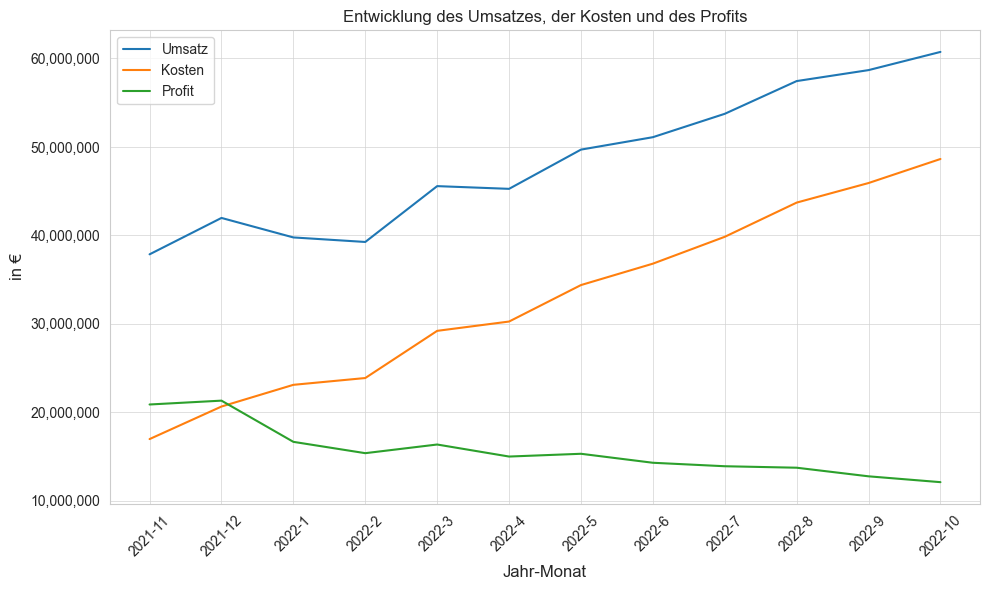

In [129]:
# Visualisierung der Entwicklung des Umsatzes, der Kosten und des Profits
fig, ax = plt.subplots(figsize=(10, 6))

# Daten plotten
ax.plot(df_development['year'].astype(str) + '-' + df_development['month'].astype(str), df_development['revenue'])
ax.plot(df_development['year'].astype(str) + '-' + df_development['month'].astype(str), df_development['cost_total'])
ax.plot(df_development['year'].astype(str) + '-' + df_development['month'].astype(str), df_development['profit_total'])

# Grid hinzufuegen
ax.grid(color='lightgrey', linestyle='-', linewidth=0.5)

# Achsenbeschriftung und Titel hinzufuegen
ax.set_xlabel('Jahr-Monat', fontsize=12)
ax.set_ylabel('in €', fontsize=12)
ax.set_title('Entwicklung des Umsatzes, der Kosten und des Profits')

# Tausendertrennzeichen hinzufuegen
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# X-Achsenbeschriftung drehen
plt.xticks(rotation=45)

# Legende hinzufuegen
ax.legend(['Umsatz', 'Kosten', 'Profit'])

# Diagramm anzeigen
plt.tight_layout()
plt.show()

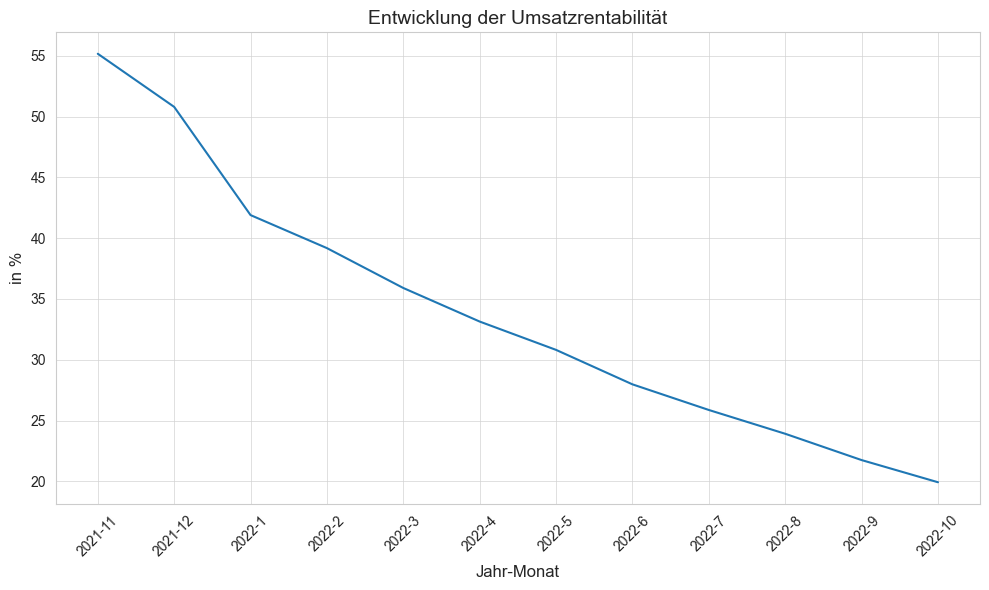

In [130]:
# Visualisierung der Entwicklung der Umsatzrentabilitaet
fig, ax = plt.subplots(figsize=(10, 6))

# Daten plotten
ax.plot(df_development['year'].astype(str) + '-' + df_development['month'].astype(str), df_development['profit_margin'])

# Grid hinzufuegen
ax.grid(color='lightgrey', linestyle='-', linewidth=0.5)

# Achsenbeschriftung und Titel hinzufuegen
ax.set_xlabel('Jahr-Monat', fontsize=12)
ax.set_ylabel('in %', fontsize=12)
ax.set_title('Entwicklung der Umsatzrentabilität', fontsize=14)

# X-Achsenbeschriftung drehen
plt.xticks(rotation=45)

# Diagramm anzeigen
plt.tight_layout()
plt.show()

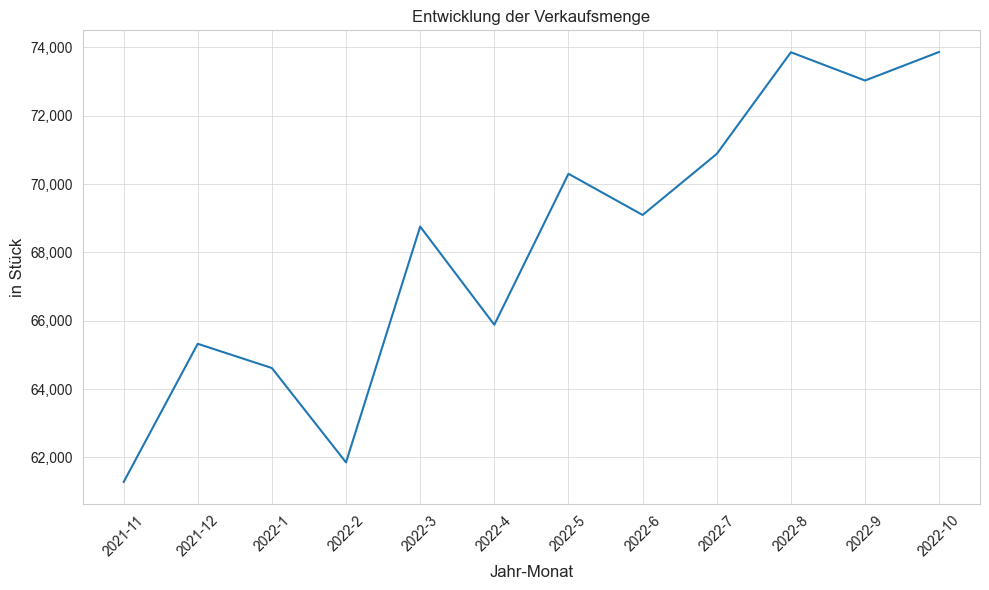

In [131]:
# Visualisierung der Entwicklung der Verkaufsmenge
fig, ax = plt.subplots(figsize=(10, 6))

# Daten plotten
ax.plot(df_development['year'].astype(str) + '-' + df_development['month'].astype(str), df_development['amount'])

# Grid hinzufuegen
ax.grid(color='lightgrey', linestyle='-', linewidth=0.5)

# Achsenbeschriftung und Titel hinzufuegen
ax.set_xlabel('Jahr-Monat', fontsize=12)
ax.set_ylabel('in Stück', fontsize=12)
ax.set_title('Entwicklung der Verkaufsmenge')

# Tausendertrennzeichen hinzufuegen
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# X-Achsenbeschriftung drehen
plt.xticks(rotation=45)

# Diagramm anzeigen
plt.tight_layout()
plt.show()

### Entwicklung der durchschnittlichen Verkaufsmenge je Transaktion

In [132]:
# Durchschnittliche Anzahl der verkauften Produkte pro Transaktion
avg_menge_pro_monat = df_sales.groupby(['year', 'month']).agg({"amount" : "mean"})
avg_menge_pro_monat.reset_index(inplace=True)
avg_menge_pro_monat

,year,month,amount
0,2021,11,2.61
1,2021,12,2.59
2,2022,1,2.47
3,2022,2,2.51
4,2022,3,2.50
5,2022,4,2.40
6,2022,5,2.40
7,2022,6,2.37
8,2022,7,2.30
9,2022,8,2.34


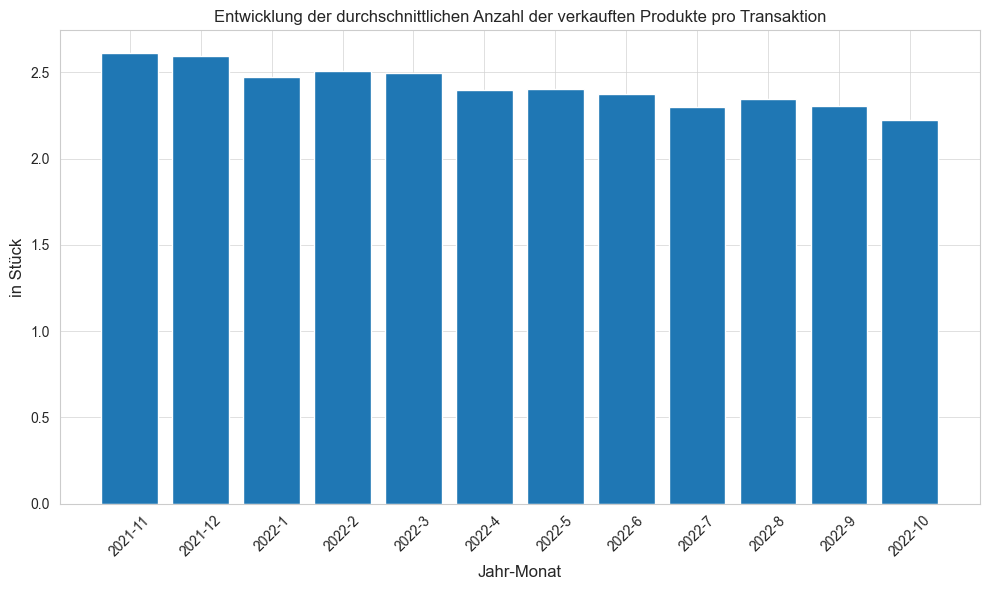

In [133]:
# Visualisierung der Entwicklung der durchschnittlichen Anzahl der verkauften Produkte pro Transaktion
fig, ax = plt.subplots(figsize=(10, 6))

# Daten plotten
ax.bar(avg_menge_pro_monat['year'].astype(str) + '-' + avg_menge_pro_monat['month'].astype(str), avg_menge_pro_monat['amount'])

# Grid hinzufuegen
ax.grid(color='lightgrey', linestyle='-', linewidth=0.5)

# Achsenbeschriftung und Titel hinzufuegen
ax.set_xlabel('Jahr-Monat', fontsize=12)
ax.set_ylabel('in Stück', fontsize=12)
ax.set_title('Entwicklung der durchschnittlichen Anzahl der verkauften Produkte pro Transaktion')

# X-Achsenbeschriftung drehen
plt.xticks(rotation=45)

# Diagramm anzeigen
plt.tight_layout()
plt.show()

### Prozentuelle Veränderung vom Anfang bis zum Ende des Beobachtungszeitraums (Anfang November 2021 - Ende Oktober 2022)

Bei der Berechnung der prozentuellen Veränderung wurden zwei Zeitpunkte miteinander verglichen: der erste Zeitpunkt (01.11.2021) und der letzte Zeitpunkt im Beobachtungszeitraum (31.10.2022).

In [134]:
# Neues Dataframe mit KPIs erstellen
df_kpi = pd.DataFrame(columns=['kpi', 'change_in_percent'])

# Liste mit den KPIs erstellen
kpi = ['amount', 'revenue', 'cost_total', 'profit_total', 'profit_margin']

# Berechnung der Veraenderung in Prozent
for i in kpi:
    change = (df_development[i].iloc[-1] / df_development[i].iloc[0] - 1) * 100
    df_kpi.loc[len(df_kpi)] = [i, change]

df_kpi

,kpi,change_in_percent
0,amount,20.55
1,revenue,60.44
2,cost_total,186.52
3,profit_total,-42.04
4,profit_margin,-63.87


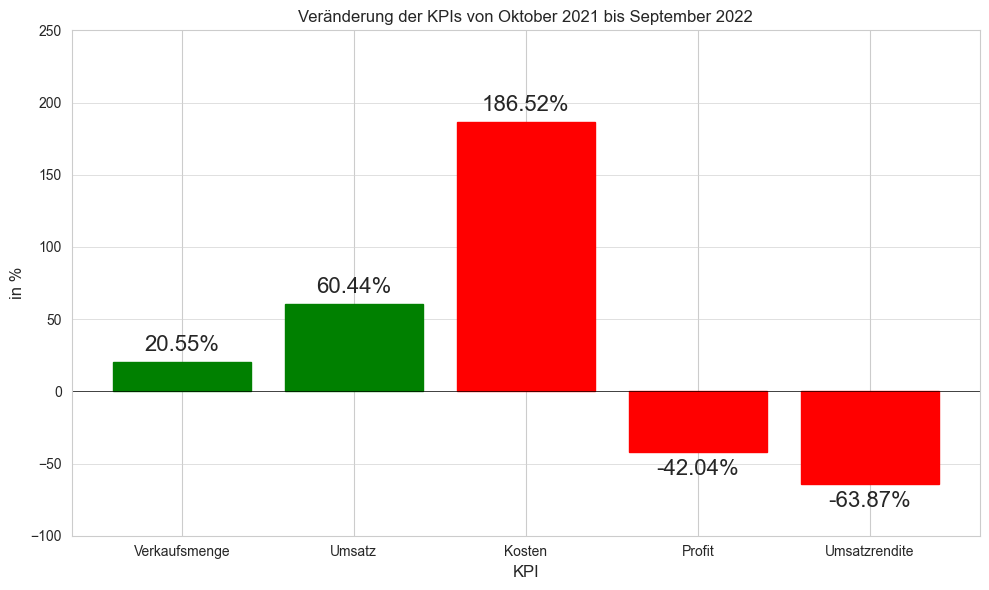

In [135]:
# Visualisierung der Veraenderung der KPIs als Saeulendiagramm
fig, ax = plt.subplots(figsize=(10, 6))

# Daten plotten
bars = ax.bar(df_kpi['kpi'], df_kpi['change_in_percent'])

# Achsenbeschriftung und Titel hinzufuegen
ax.set_title('Veränderung der KPIs von Oktober 2021 bis September 2022')
ax.set_xlabel('KPI', fontsize=12)
ax.set_ylabel('in %', fontsize=12)

# Horizontales Grid hinzufuegen
ax.yaxis.grid(color='lightgrey', linestyle='-', linewidth=0.5)

# Linie bei 0 hinzufuegen
ax.axhline(0, color='black', linewidth=0.5)

# Farbe der Saeulen anpassen
ax.patches[0].set_color('green')
ax.patches[1].set_color('green')
ax.patches[2].set_color('red')
ax.patches[3].set_color('red')
ax.patches[4].set_color('red')

# Beschriftung der Saeulen hinzufuegen
ax.bar_label(bars, fmt='%.2f%%', padding=5, fontsize=16)

# y-Achsenskala anpassen
ax.set_ylim(ymax=250)
ax.set_ylim(ymin=-100)

# X-Achsenbeschriftung
ax.xaxis.set_ticks(np.arange(5))
ax.set_xticklabels(['Verkaufsmenge', 'Umsatz', 'Kosten', 'Profit', 'Umsatzrendite'])

# Diagramm anzeigen
plt.tight_layout()
plt.show()

**Erkenntnisse der Analyse:**

Die Betrachtung der allgemeinen wirtschaftlichen Entwicklung der Tablet GmbH in den letzten 12 Monaten zeigt sowohl positive als auch negative Trends auf.

Auf der einen Seite wurde die monatliche Verkaufsmenge von rund 61.000 Stück im Oktober 2021 um 20 % auf fast 74.000 Stück im November 2022 gesteigert. Einen ähnlichen positiven Trend kann man in der Umsatzentwicklung erkennen. Hier ist der Umsatz im Beobachtungszeitraum um rund 60 % gestiegen. Im Hinblick auf die durchschnittliche Verkaufsmenge je Transaktion ist jedoch ein leichter Abwärtstrend zu beobachten.

Auf der anderen Seite ist ein drastischer Negativtrend in der Kosten-, Profit- und Umsatzrenditenentwicklung erkennbar. Die Kosten sind im Verlauf der letzten 12 Monate mit einem Zuwachs von 186 % geradezu explodiert, wodurch der Gewinn um rund 42 % gesunken ist. Dementsprechend ist auch die Umsatzrendite von ca. 55 % im Oktober 2021 auf ca. 19 % im November 2022 abgestürzt, was einer Senkung von ca. 64 % entspricht.

Zusammmengefasst lässt sich also sagen, dass die wirtschaftliche Entwicklung der Tablet GmbH definitiv negativ war und dass es trotz Wachstum ein Gewinnrückgang zu verzeichnen ist. Die folgenden Analysen untersuchen nun die Gründe für diese Entwicklung, um daraufhin geeignete Handlungsempfehlungen zu formulieren.


# <span style="color:red">Ende Analyse Vince. Die folgenden Grafiken habe ich aus dem Notebook Vince_Analysen_neu eingefügt, da wir sie in der Präsi verwendet haben.</span>

# 9. Analyse der Produktperformance

In [136]:
pd.options.display.float_format = '{:,.2f}'.format
df_unit_cost = df_sales.groupby('product').agg({'amount': np.sum, 'cost_total' : np.sum})
df_unit_cost['cost_per_unit'] = df_unit_cost['cost_total'] / df_unit_cost['amount']
df_unit_cost.reset_index()

C:\Users\cicek\AppData\Local\Temp\ipykernel_4964\2619181994.py:2: FutureWarning: The provided callable <function sum at 0x00000256C6AE8680> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_unit_cost = df_sales.groupby('product').agg({'amount': np.sum, 'cost_total' : np.sum})
C:\Users\cicek\AppData\Local\Temp\ipykernel_4964\2619181994.py:2: FutureWarning: The provided callable <function sum at 0x00000256C6AE8680> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_unit_cost = df_sales.groupby('product').agg({'amount': np.sum, 'cost_total' : np.sum})


,product,amount,cost_total,cost_per_unit
0,Tablet Basic,224240,"66,372,966.49",295.99
1,Tablet Mini,276515,"58,453,967.68",211.40
2,Tablet Pro,317993,"268,538,743.05",844.48


In [137]:
df_sales_basic_channel = df_sales[df_sales['product'] == 'Tablet Basic'].groupby('channel').agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})
df_sales_basic_region = df_sales[df_sales['product'] == 'Tablet Basic'].groupby('region').agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

df_sales_basic_channel.reset_index(inplace=True)
df_sales_basic_region.reset_index(inplace=True)

df_sales_mini_channel = df_sales[df_sales['product'] == 'Tablet Mini'].groupby('channel').agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})
df_sales_mini_region = df_sales[df_sales['product'] == 'Tablet Mini'].groupby('region').agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

df_sales_mini_channel.reset_index(inplace=True)
df_sales_mini_region.reset_index(inplace=True)

df_sales_pro_channel = df_sales[df_sales['product'] == 'Tablet Pro'].groupby('channel').agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})
df_sales_pro_region = df_sales[df_sales['product'] == 'Tablet Pro'].groupby('region').agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

df_sales_pro_channel.reset_index(inplace=True)
df_sales_pro_region.reset_index(inplace=True)

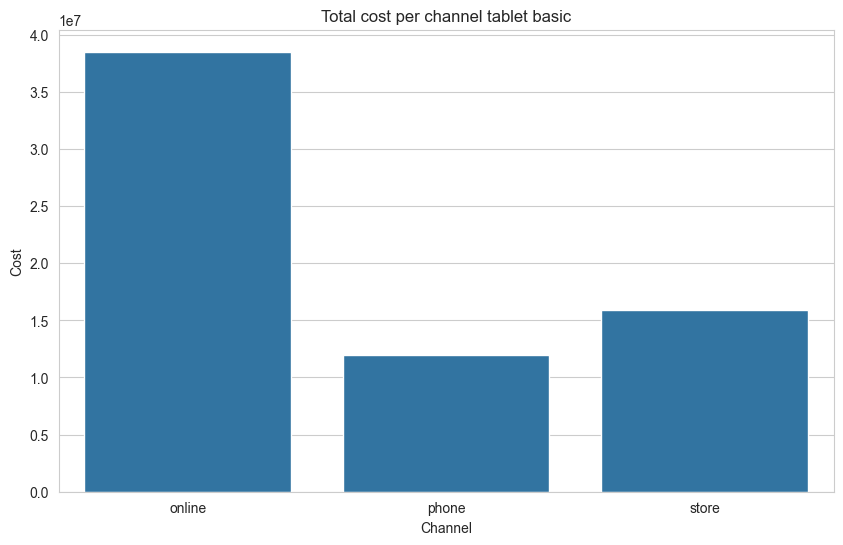

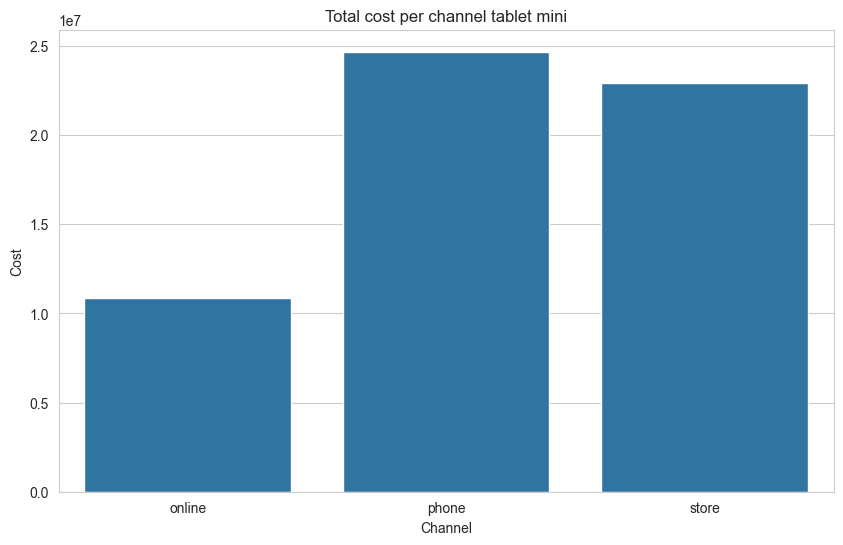

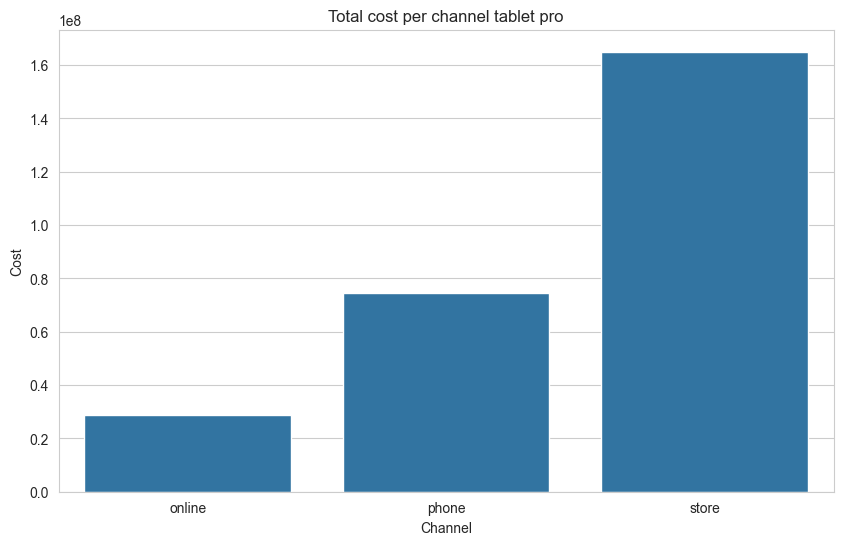

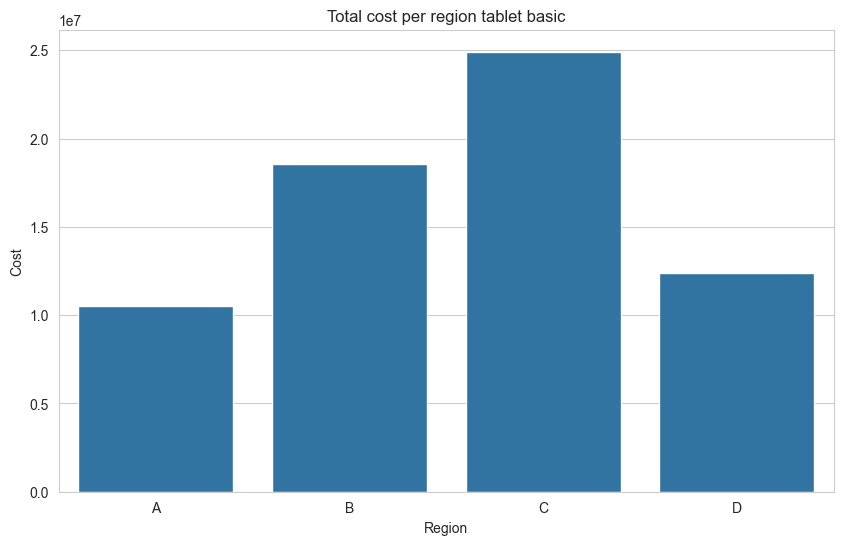

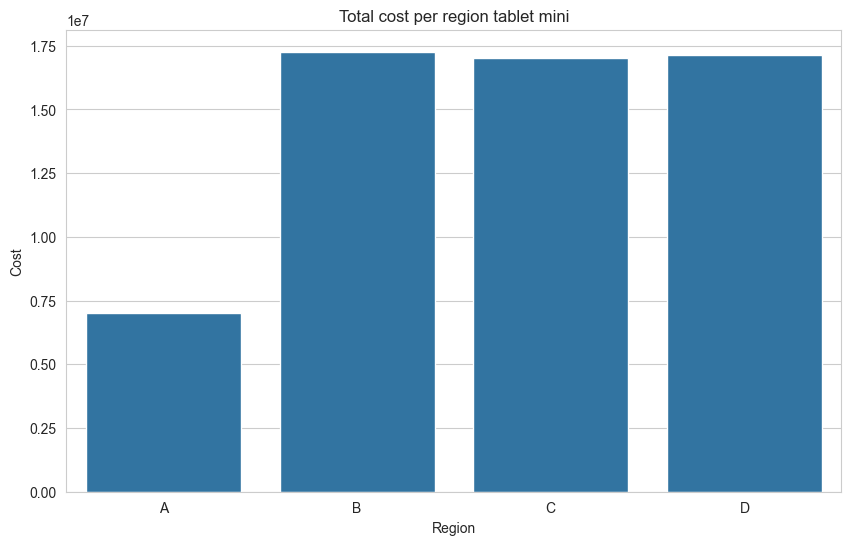

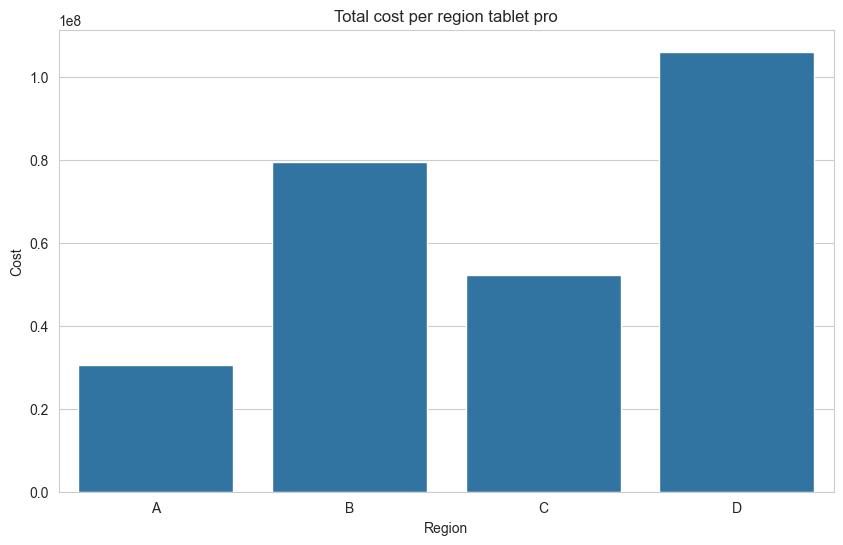

In [138]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_sales_basic_channel, x='channel', y='cost_total')
plt.title('Total cost per channel tablet basic')
plt.xlabel('Channel')
plt.ylabel('Cost')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_sales_mini_channel, x='channel', y='cost_total')
plt.title('Total cost per channel tablet mini')
plt.xlabel('Channel')
plt.ylabel('Cost')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_sales_pro_channel, x='channel', y='cost_total')
plt.title('Total cost per channel tablet pro')
plt.xlabel('Channel')
plt.ylabel('Cost')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_sales_basic_region, x='region', y='cost_total')
plt.title('Total cost per region tablet basic')
plt.xlabel('Region')
plt.ylabel('Cost')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_sales_mini_region, x='region', y='cost_total')
plt.title('Total cost per region tablet mini')
plt.xlabel('Region')
plt.ylabel('Cost')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_sales_pro_region, x='region', y='cost_total')
plt.title('Total cost per region tablet pro')
plt.xlabel('Region')
plt.ylabel('Cost')
plt.show()

In [139]:
cost_per_region_product_channel = df_sales.groupby(['region', 'product', 'channel'])['cost_total'].sum()/1_000_000
cost_per_region_product_channel = cost_per_region_product_channel.reset_index()
cost_per_region_product_channel

,region,product,channel,cost_total
0,A,Tablet Basic,online,7.69
1,A,Tablet Basic,phone,1.18
2,A,Tablet Basic,store,1.63
3,A,Tablet Mini,online,2.29
4,A,Tablet Mini,phone,2.45
5,A,Tablet Mini,store,2.25
6,A,Tablet Pro,online,6.78
7,A,Tablet Pro,phone,7.33
8,A,Tablet Pro,store,16.48
9,B,Tablet Basic,online,10.17


In [140]:
profit_per_region_product_channel = df_sales.groupby(['region', 'product', 'channel'])['profit_total'].sum()/1_000_000
profit_per_region_product_channel = profit_per_region_product_channel.reset_index()
profit_per_region_product_channel = profit_per_region_product_channel.replace({'product': {'Tablet Basic': 'Basic', 'Tablet Mini': 'Mini', 'Tablet Pro': 'Pro'}})
profit_per_region_product_channel

,region,product,channel,profit_total
0,A,Basic,online,6.50
1,A,Basic,phone,0.84
2,A,Basic,store,0.43
3,A,Mini,online,5.11
4,A,Mini,phone,4.95
5,A,Mini,store,2.17
6,A,Pro,online,1.73
7,A,Pro,phone,1.83
8,A,Pro,store,2.25
9,B,Basic,online,7.80


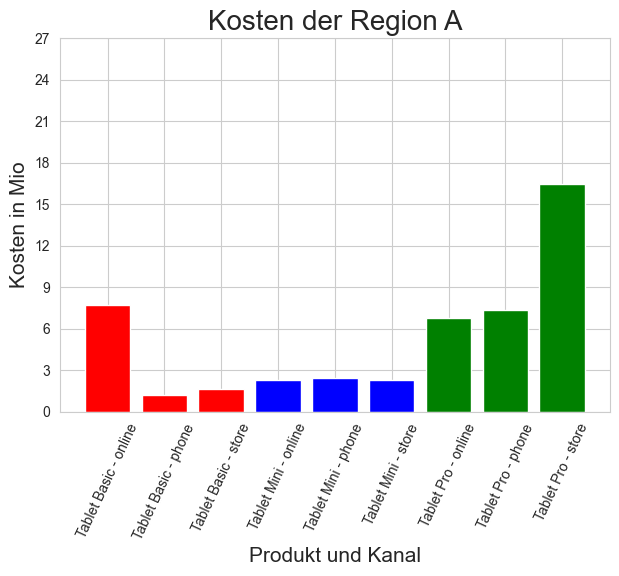

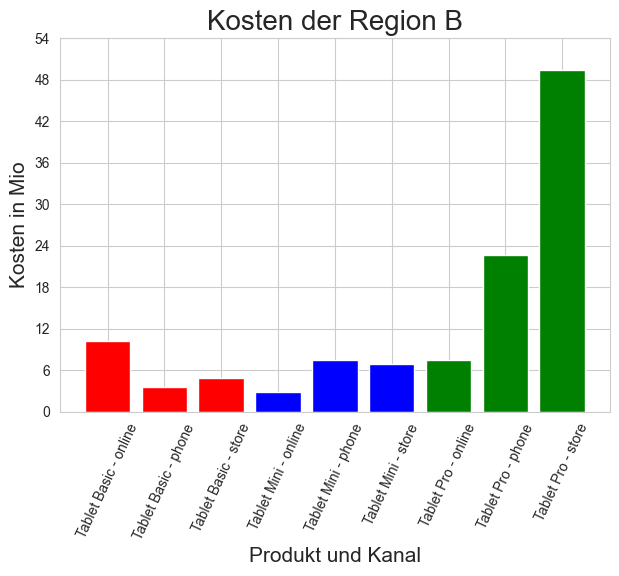

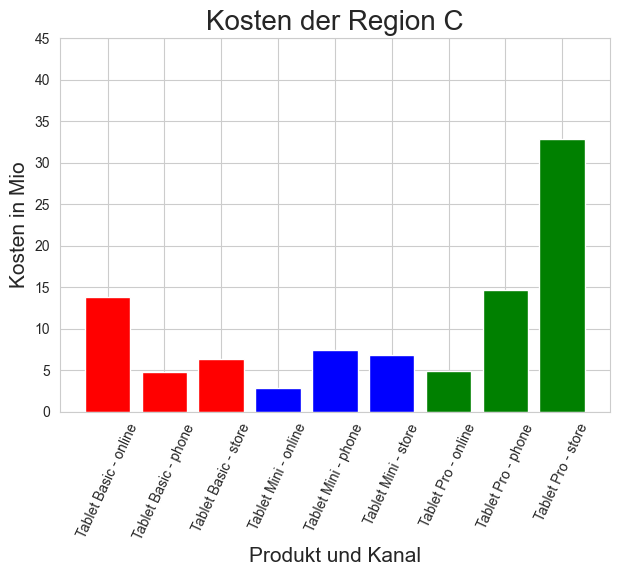

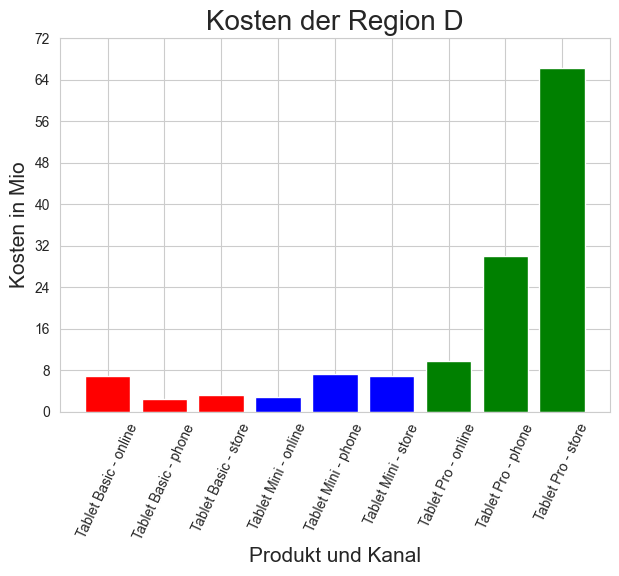

In [141]:
region_costs = cost_per_region_product_channel['region'].unique()

# Iteration über die einzelnen Regionen
for region_cost in region_costs:
    # Filtern der Daten für die aktuelle Region
    region_data = cost_per_region_product_channel[cost_per_region_product_channel['region'] == region_cost]
    
    # Diagramm erstellen
    fig, ax = plt.subplots()
    
    # Erstellen der x-Achsenbeschriftungen für das Säulendiagramm
    products = region_data['product']
    channels = region_data['channel']
    labels = [f'{product} - {channel}' for product, channel in zip(products, channels)]
    
    # Extrahieren der Gewinne
    costs = region_data['cost_total']
    
    # Festlegen der Farben für Basic, Mini und Pro
    colors = ['r' if product == 'Tablet Basic' else 'b' if product == 'Tablet Mini' else 'g' for product in products]
    
    # Erstellen des Säulendiagramms mit den entsprechenden Farben
    plt.bar(labels, costs, color=colors)
    
    # Achsentitel und Diagrammtitel
    
    plt.xlabel('Produkt und Kanal', size = 15)
    plt.ylabel('Kosten in Mio', size = 15)
    plt.title(f'Kosten der Region {region_cost}', size = 20)
    
  
    # Anpassung des Layouts und Anzeigen des Diagramms
    plt.tight_layout()
    
    # Gitterlinien aktivieren
    plt.grid(True)

    # Gitter in den Hintergrund legen
    ax.set_axisbelow(True)
     
    # Anpassung x-Achse und y-Achse
    import math
    max = math.ceil(costs.max() / 10.0) * 10 + 10
    ticks = max / 10
    plt.xticks(rotation = 65)
    plt.yticks(np.arange(0, max, ticks))
    plt.show()

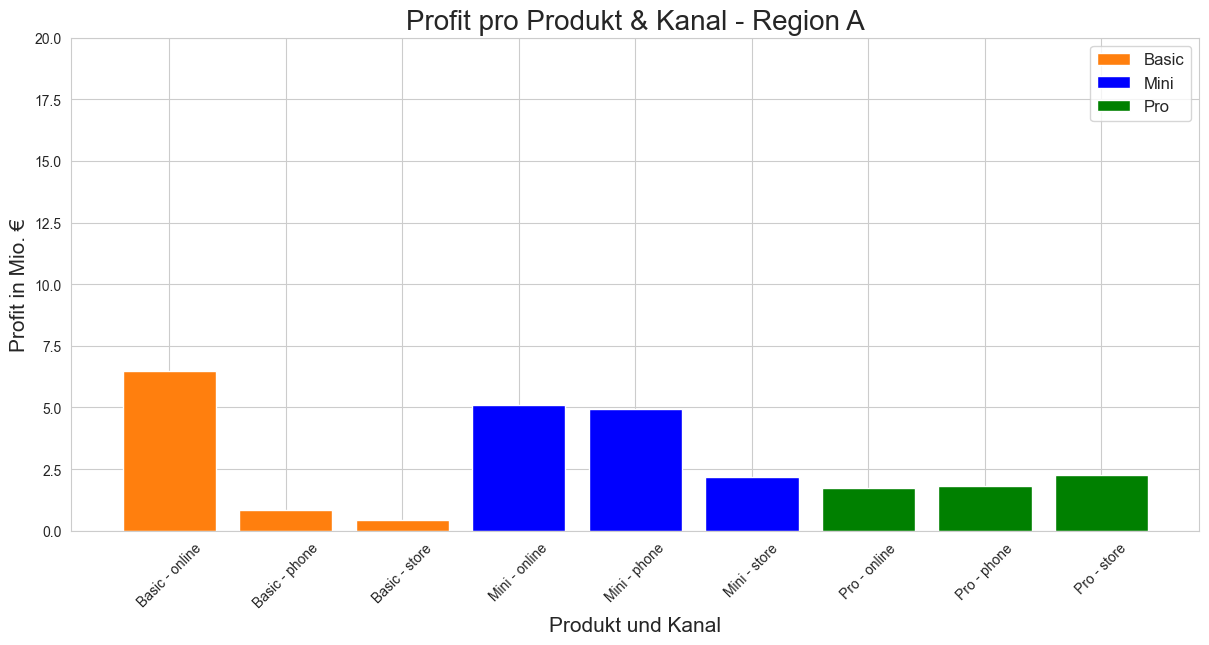

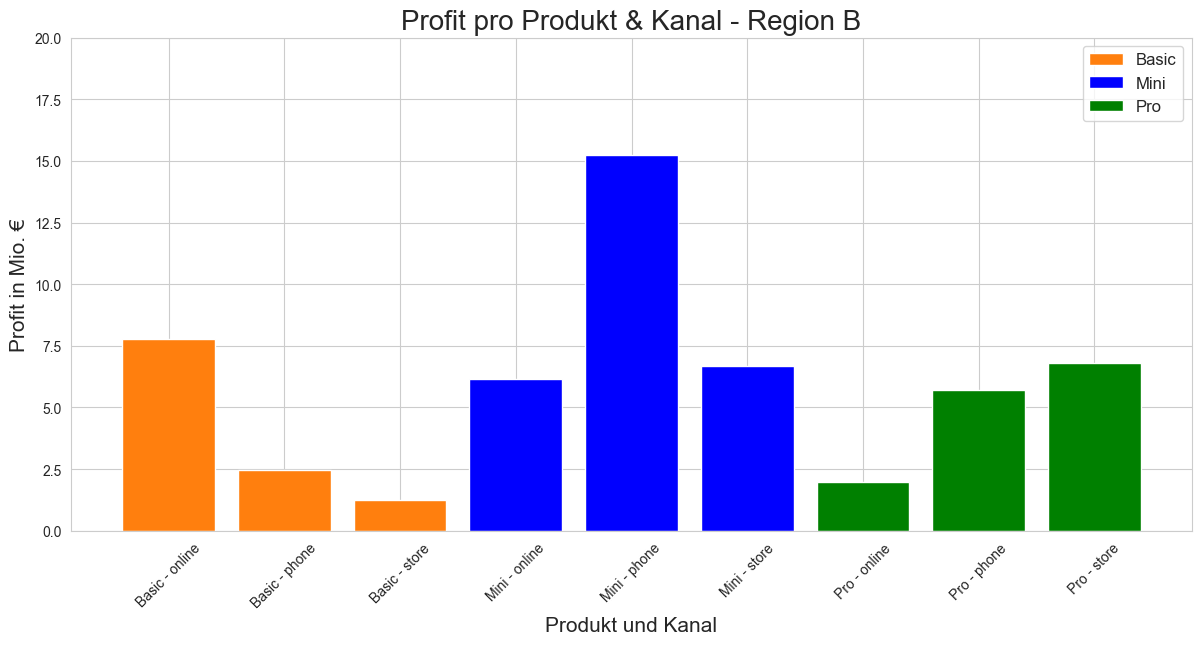

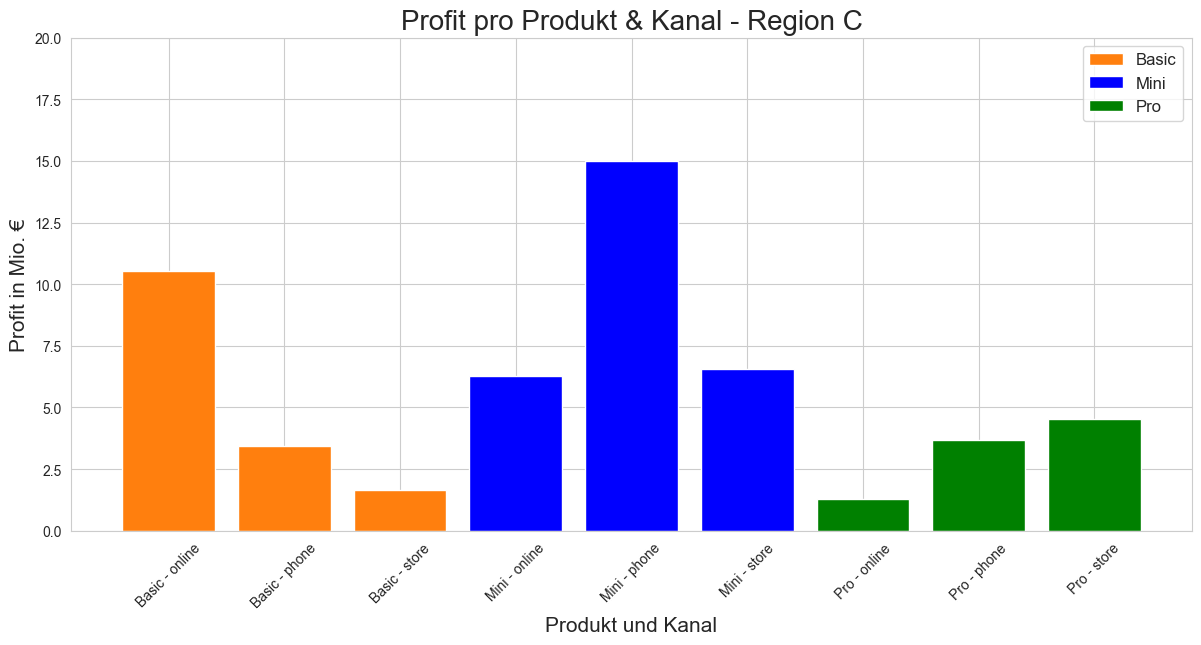

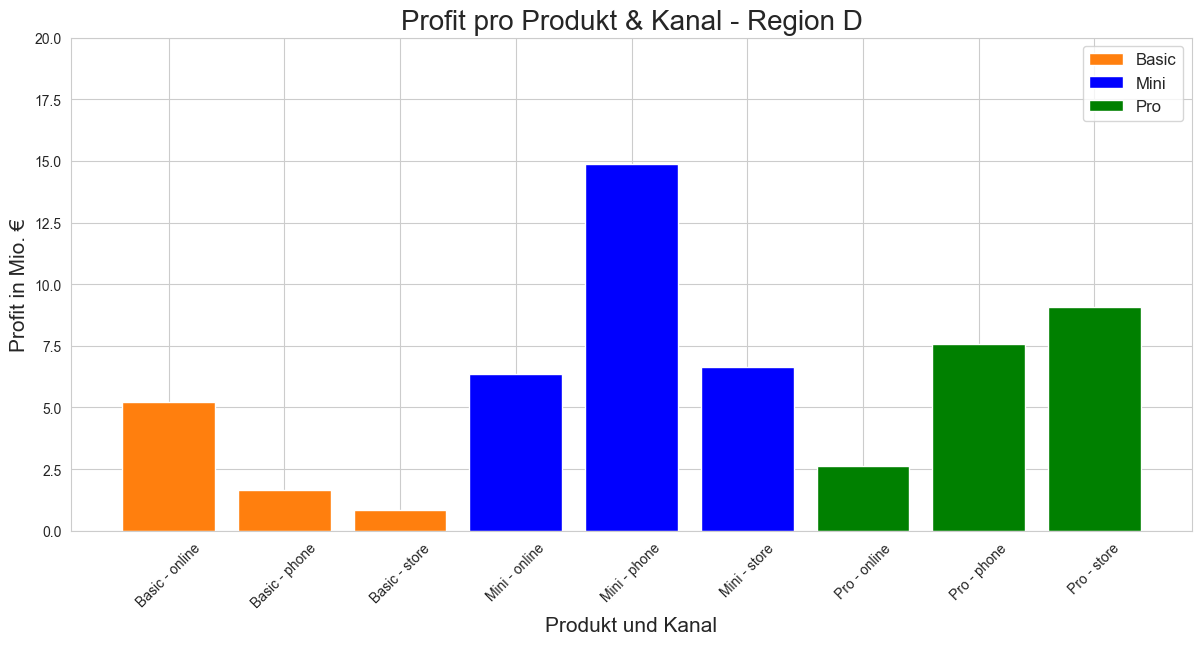

In [142]:
from matplotlib.patches import Patch

region_costs = profit_per_region_product_channel['region'].unique()

# Iteration über die einzelnen Regionen
for region_cost in region_costs:
    # Filtern der Daten für die aktuelle Region
    region_data = profit_per_region_product_channel[profit_per_region_product_channel['region'] == region_cost]
    
    # Diagramm erstellen
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Erstellen der x-Achsenbeschriftungen für das Säulendiagramm
    products = region_data['product']
    channels = region_data['channel']
    labels = [f'{product} - {channel}' for product, channel in zip(products, channels)]
    
    # Extrahieren der Gewinne
    profits = region_data['profit_total']
    
    # Festlegen der Farben für Basic, Mini und Pro
    colors = ['tab:orange' if product == 'Basic' else 'b' if product == 'Mini' else 'g' for product in products]
    
    # Erstellen des Säulendiagramms mit den entsprechenden Farben
    plt.bar(labels, profits, color=colors)
    
    # Achsentitel und Diagrammtitel
    plt.xlabel('Produkt und Kanal', size = 15)
    plt.ylabel('Profit in Mio. €', size = 15)
    plt.title(f'Profit pro Produkt & Kanal - Region {region_cost}', size = 20)
    
    # Anpassung des Layouts und Anzeigen des Diagramms
    plt.tight_layout()
    
    # Gitterlinien aktivieren
    plt.grid(True)

    # Legende anzeigen mit den entsprechenden Farben
    legend_elements = [Patch(facecolor='tab:orange', label='Basic'),
                          Patch(facecolor='b', label='Mini'),
                          Patch(facecolor='g', label='Pro')]
    plt.legend(handles=legend_elements, loc='upper right', fontsize='large')

    # Gitter in den Hintergrund legen
    ax.set_axisbelow(True)
     
    # Anpassung x-Achse und y-Achse
    import math
    #max = math.ceil(profits.max() / 10.0) * 10 + 5
    max = 22.5
    ticks = 2.5
    plt.xticks(rotation = 45)
    plt.yticks(np.arange(0, max, ticks))
    plt.show()

In [143]:
# Transaktionen mit Verlust
df_sales_negative_profit = df_sales[df_sales['profit_total'] < 0]
df_sales_negative_profit.head

<bound method NDFrame.head of              date       product  discount  amount  tablet_basic  tablet_mini  \
48806  2022-01-01  Tablet Basic      0.10       9             1            0   
52656  2022-01-05  Tablet Basic      0.10      11             1            0   
52659  2022-01-05  Tablet Basic      0.10      11             1            0   
60396  2022-01-15  Tablet Basic      0.10       8             1            0   
65847  2022-01-21  Tablet Basic      0.10       9             1            0   
...           ...           ...       ...     ...           ...          ...   
338986 2022-10-31  Tablet Basic      0.10       3             1            0   
338988 2022-10-31  Tablet Basic      0.10       5             1            0   
338989 2022-10-31  Tablet Basic      0.00       2             1            0   
338996 2022-10-31  Tablet Basic      0.10       3             1            0   
339003 2022-10-31  Tablet Basic      0.00       2             1            0   

        t

In [144]:
# Welche Produkte wurden mit einem Verlust verkauft?
df_sales_negative_profit['product'].unique()

array(['Tablet Basic'], dtype=object)

In [145]:
# Summe des Verlusts
df_sales_negative_profit['profit_total'].sum()

-459619.7704372656

In [146]:
# In welchen Verkaufskanälen und Regionen wurden die Produkte mit negativem Gewinn verkauft und wie oft?
df_sales_negative_profit.groupby(['region', 'channel']).agg({'transaction_id': 'count', 'profit_total': 'sum'})

transaction_id  profit_total
region channel                              
A      online               42    -10,857.51
       phone                21     -3,889.07
       store               177    -32,965.08
B      online              130    -24,764.83
       phone                50     -8,280.72
       store               524   -107,624.33
C      online              162    -28,386.68
       phone                61     -9,026.07
       store               674   -143,836.81
D      online               93    -17,198.17
       phone                40     -9,229.26
       store               340    -63,561.26

In [147]:
# Group by channel, product and sum up amount
sales_per_product_by_channel = df_sales.groupby(['channel', 'product']).agg({'amount': 'sum'})
sales_per_product_by_channel = sales_per_product_by_channel.reset_index()
sales_per_product_by_channel

,channel,product,amount
0,online,Tablet Basic,141081
1,online,Tablet Mini,62273
2,online,Tablet Pro,36558
3,phone,Tablet Basic,41819
4,phone,Tablet Mini,133669
5,phone,Tablet Pro,93539
6,store,Tablet Basic,41340
7,store,Tablet Mini,80573
8,store,Tablet Pro,187896


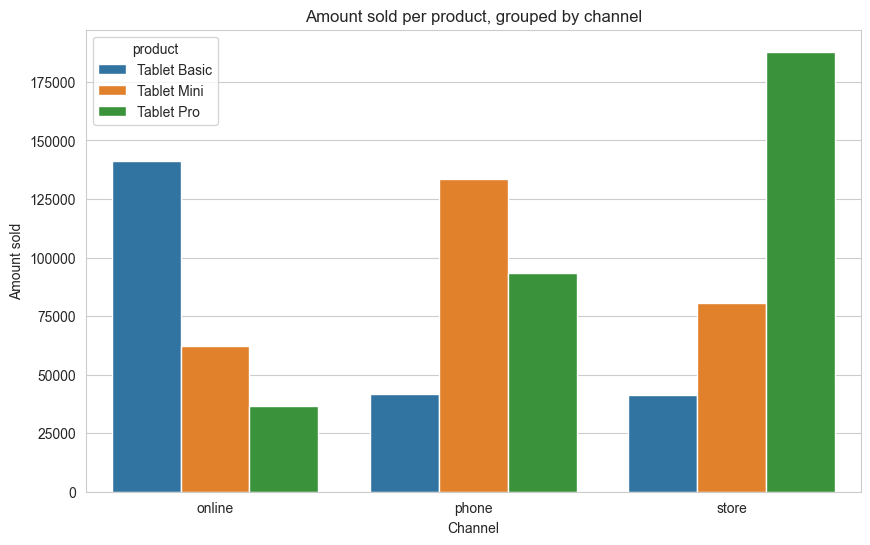

In [148]:
plt.figure(figsize=(10, 6))

sns.barplot(data=sales_per_product_by_channel, x='channel', y='amount', hue='product')

plt.title('Amount sold per product, grouped by channel')
plt.xlabel('Channel')
plt.ylabel('Amount sold')
plt.show()

In [149]:
# Group by region, product and sum up amount
sales_per_product_by_region = df_sales.groupby(['region', 'product']).agg({'amount': 'sum'})
sales_per_product_by_region = sales_per_product_by_region.reset_index()
sales_per_product_by_region

,region,product,amount
0,A,Tablet Basic,37414
1,A,Tablet Mini,34399
2,A,Tablet Pro,36433
3,B,Tablet Basic,61842
4,B,Tablet Mini,81098
5,B,Tablet Pro,94030
6,C,Tablet Basic,83512
7,C,Tablet Mini,80366
8,C,Tablet Pro,61928
9,D,Tablet Basic,41472


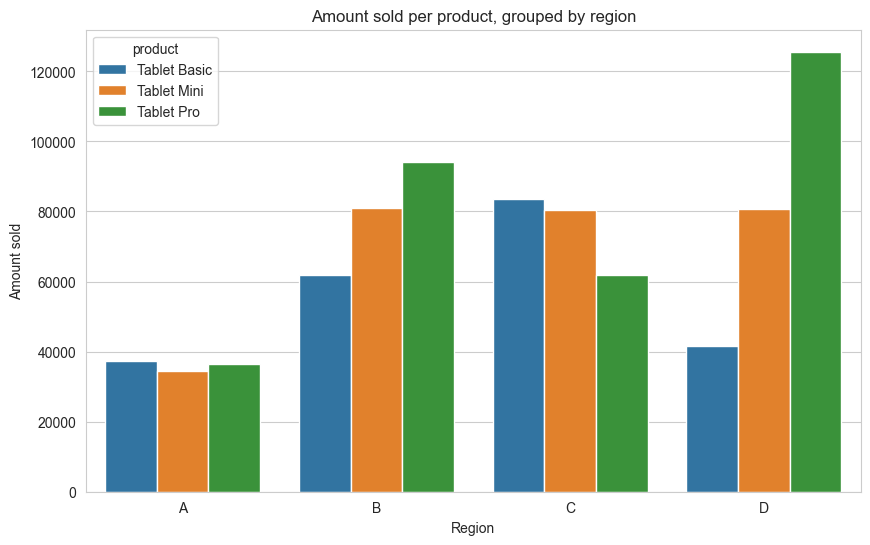

In [150]:
plt.figure(figsize=(10, 6))

sns.barplot(data=sales_per_product_by_region, x='region', y='amount', hue='product')

plt.title('Amount sold per product, grouped by region')
plt.xlabel('Region')
plt.ylabel('Amount sold')
plt.show()

# Umsatzanteile nach Regionen

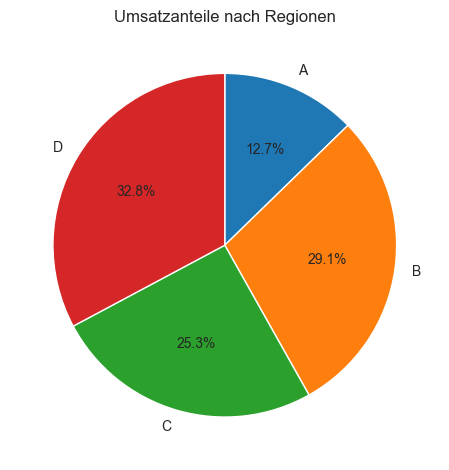

In [151]:
# Anteil am Umsatz nach Region als Kreisdiagramm
df_sales_per_region = df_sales.groupby(['region'])['revenue'].sum()

# Kreisdiagramm
plt.pie(df_sales_per_region, labels=df_sales_per_region.index, autopct='%1.1f%%', counterclock=False, startangle=90)
plt.title('Umsatzanteile nach Regionen')

plt.tight_layout()
plt.show()

# Umsatzanteile nach Verkaufskanälen

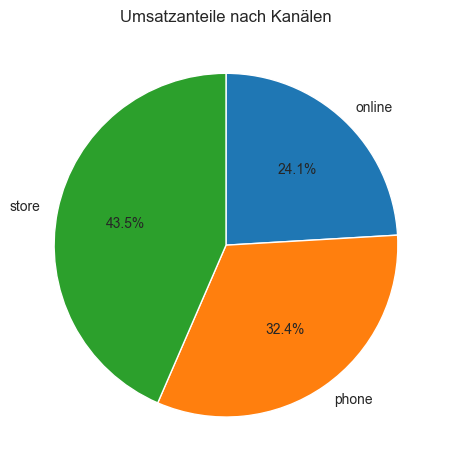

In [152]:
# Anteil am Umsatz nach Kanal als Kreisdiagramm
df_sales_per_channel = df_sales.groupby(['channel'])['revenue'].sum()

# Kreisdiagramm
plt.pie(df_sales_per_channel, labels=df_sales_per_channel.index, autopct='%1.1f%%', counterclock=False, startangle=90)
plt.title('Umsatzanteile nach Kanälen')

plt.tight_layout()
plt.show()

# Umsatzanteile nach Produkten

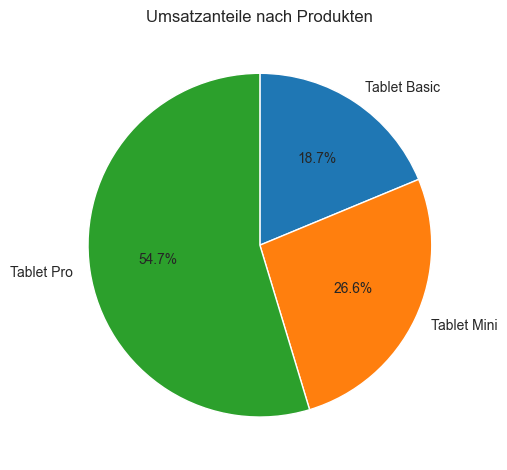

In [153]:
# Anteil am Umsatz nach Produkt als Kreisdiagramm
df_sales_per_product = df_sales.groupby(['product'])['revenue'].sum()

# Kreisdiagramm
plt.pie(df_sales_per_product, labels=df_sales_per_product.index, autopct='%1.1f%%', counterclock=False, startangle=90)
plt.title('Umsatzanteile nach Produkten')

plt.tight_layout()
plt.show()

# Downtime-Daten als Säulendiagramm

# <span style="color:red">Alles hiernach gehört zu Silas Analyse, daher habe ich es stehen lassen.</span>

### Analyse der Kunden Bewertungen und der Verkauften Geräte nach Produkt und Zeit aufgeschlüsselt

In [154]:
df_sales.groupby(["product","year", "month"]).agg({"customer_rating" : {"mean", "median", "min", "max"}, "amount" : "count"}).round(2)

customer_rating                  amount
                                    max  min median mean  count
product      year month                                        
Tablet Basic 2021 11              10.00 3.70   6.60 6.79  11406
                  12              10.00 3.40   6.20 6.39  11077
             2022 1               10.00 3.00   5.90 6.04   9897
                  2               10.00 2.70   5.60 5.70   8419
                  3               10.00 2.80   5.30 5.42   8149
                  4               10.00 2.20   5.10 5.20   7071
                  5               10.00 2.10   4.80 4.92   6497
                  6               10.00 2.00   4.60 4.73   5158
                  7               10.00 1.80   4.50 4.56   4509
                  8               10.00 2.00   4.30 4.42   3556
                  9                9.80 1.60   4.20 4.31   2538
                  10               8.40 1.60   4.10 4.23   1723
Tablet Mini  2021 11              10.00 5.20   8.80 8.75   8986
                  12              10.00 5.30   8.60 8.61   9169
             2022 1               10.00 5.20   8.50 8.49   9335
                  2               10.00 4.80   8.30 8.37   8645
                  3               10.00 4.30   8.20 8.23   9351
                  4               10.00 4.30   8.00 8.10   9099
                  5               10.00 4.30   7.90 7.94   9420
                  6               10.00 4.40   7.70 7.83   9003
                  7               10.00 3.90   7.60 7.68   9227
                  8               10.00 3.30   7.40 7.52   9349
                  9               10.00 4.00   7.30 7.40   9046
                  10              10.00 4.20   7.20 7.29   9370
Tablet Pro   2021 11              10.00 5.00   7.80 7.93   3061
                  12              10.00 4.50   7.80 7.94   4928
             2022 1               10.00 5.00   7.80 7.96   6876
                  2               10.00 4.70   7.90 8.02   7601
                  3               10.00 4.70   8.00 8.05  10033
                  4               10.00 5.00   8.00 8.11  11309
                  5               10.00 4.50   8.10 8.17  13356
                  6               10.00 4.50   8.10 8.21  14962
                  7               10.00 4.70   8.20 8.31  17062
                  8               10.00 5.00   8.30 8.38  18595
                  9               10.00 5.30   8.40 8.48  20088
                  10              10.00 5.10   8.50 8.57  22129

**Anlyse der Kundenbewertungen:**

Was man aus der Tabelle schon ablesen kann ist das die Bewertungen der Kunden für das Tablet Mini und das Tablet Basic schlechter werden und für das Pro besser werden. Gleichzeitig bewegen sich die Verkaufszahlen in dieselbe Richtung wie die Bewertungen scheinen aber nicht direkt im Zusammenhang zu stehen.

## Vetriebskanäle

In [155]:
df_sales_online = df_sales[df_sales['channel'] == 'online']
df_sales_phone = df_sales[df_sales['channel'] == 'phone']
df_sales_store = df_sales[df_sales['channel'] == 'store']

### Verkaufte Geräte pro Verkaufskanal

In [156]:
# Group by month and count sales
df_sales_online_monthly = df_sales_online.groupby(df_sales_online['date'].dt.to_period('M'))['amount'].sum().reset_index()
df_sales_phone_monthly = df_sales_phone.groupby(df_sales_phone['date'].dt.to_period('M'))['amount'].sum().reset_index()
df_sales_store_monthly = df_sales_store.groupby(df_sales_store['date'].dt.to_period('M'))['amount'].sum().reset_index()

df_sales_online_monthly['date'] = df_sales_online_monthly['date'].dt.to_timestamp()
df_sales_phone_monthly['date'] = df_sales_phone_monthly['date'].dt.to_timestamp()
df_sales_store_monthly['date'] = df_sales_store_monthly['date'].dt.to_timestamp()

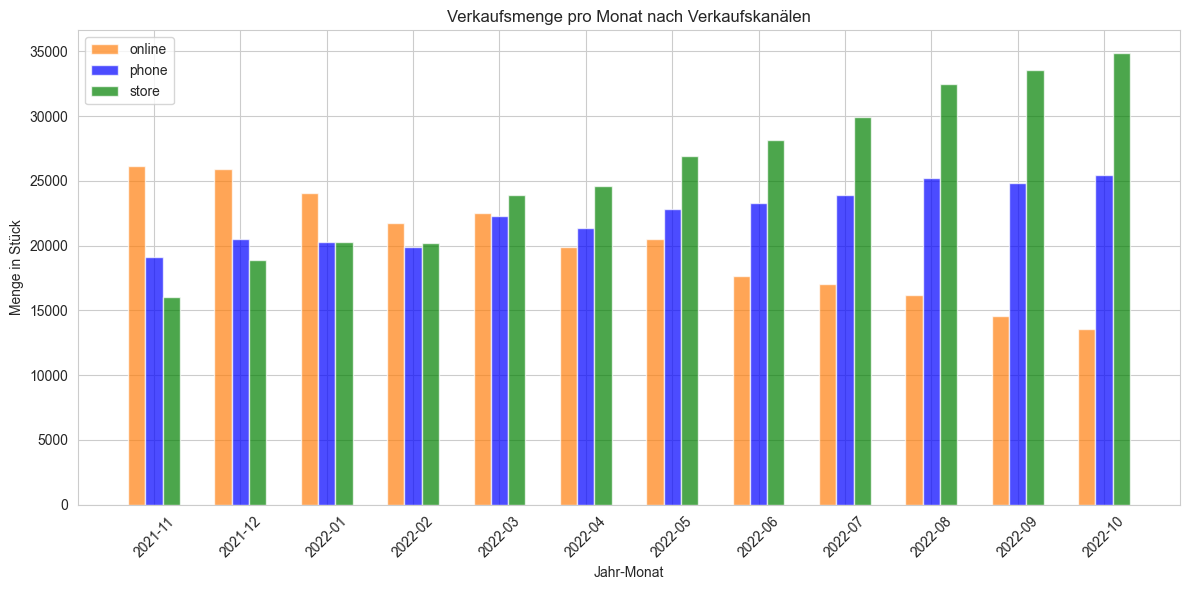

In [157]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Extract year and month from the 'date' column
df_sales_online_monthly['year_month'] = df_sales_online_monthly['date'].dt.strftime('%Y-%m')

# Create a list of unique year_month values for x-axis
x_labels = df_sales_online_monthly['year_month'].unique()
x = np.arange(len(df_sales_online_monthly['date']))

# Define the width for each bar
bar_width = 0.2

# Create the bar plots for each sales channel
plt.bar(x - bar_width, df_sales_online_monthly['amount'], width=bar_width, label='online', color='tab:orange', alpha=0.7)
plt.bar(x, df_sales_phone_monthly['amount'], width=bar_width, label='phone', color='b', alpha=0.7)
plt.bar(x + bar_width, df_sales_store_monthly['amount'], width=bar_width, label='store', color='g', alpha=0.7)

# Enhance the plot with titles and labels
plt.title('Verkaufsmenge pro Monat nach Verkaufskanälen')
plt.xlabel('Jahr-Monat')
plt.ylabel('Menge in Stück')

# Set x-axis ticks and labels to be the dates
plt.xticks(x, x_labels, rotation=45)

# Add legend
plt.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

**Analyse der Absatzmengen pro Vertriebskanäle:**

Wir sehen stark fallende Absatzzahlen für den Vertriebskanal online, einen leichten anstieg im phone Vertriebskanal und einen starken anstieg im store Vertriebskanal im Beobachtungszeitraum. Das starke Wachstum des store Geschäfts sorgt also dafür das wir trotzdem einen Anstieg bei den Absatzzahlen verzeichnen können. Es gilt jetzt zu analysieren warum die Vertriebskanäle sich so verhalten. 

### Verkaufte Produkte pro Verkaufskanal

Ein Grund für die unterschiedlichen Trends der in den einzelnen Vertriebskanälen könnte daran liegen das sie unterschiedlich stark von den einzelnen Produkttrends beeinflusst werden. Wir Analysieren also im folgenden welche Produkte im welchen Vertriebskanal abgesetzt werden und ob die Trends der Absatzmenge der einzelnen Produkte konstant ist über alle Vertriebskanäle.

#### Online

In [158]:
df_sales_online_basic = df_sales_online[df_sales_online['product'] == 'Tablet Basic']
df_sales_online_mini = df_sales_online[df_sales_online['product'] == 'Tablet Mini']
df_sales_online_pro = df_sales_online[df_sales_online['product'] == 'Tablet Pro']

# Group by month and count sales
df_sales_online_basic_monthly = df_sales_online_basic.groupby(df_sales_online_basic['date'].dt.to_period('M'))['amount'].sum().reset_index()
df_sales_online_mini_monthly = df_sales_online_mini.groupby(df_sales_online_mini['date'].dt.to_period('M'))['amount'].sum().reset_index()
df_sales_online_pro_monthly = df_sales_online_pro.groupby(df_sales_online_pro['date'].dt.to_period('M'))['amount'].sum().reset_index()

df_sales_online_basic_monthly['date'] = df_sales_online_basic_monthly['date'].dt.to_timestamp()
df_sales_online_mini_monthly['date'] = df_sales_online_mini_monthly['date'].dt.to_timestamp()
df_sales_online_pro_monthly['date'] = df_sales_online_pro_monthly['date'].dt.to_timestamp()

#### Phone

In [159]:
df_sales_phone_basic = df_sales_phone[df_sales_phone['product'] == 'Tablet Basic']
df_sales_phone_mini = df_sales_phone[df_sales_phone['product'] == 'Tablet Mini']
df_sales_phone_pro = df_sales_phone[df_sales_phone['product'] == 'Tablet Pro']

# Group by month and count sales
df_sales_phone_basic_monthly = df_sales_phone_basic.groupby(df_sales_phone_basic['date'].dt.to_period('M'))['amount'].sum().reset_index()
df_sales_phone_mini_monthly = df_sales_phone_mini.groupby(df_sales_phone_mini['date'].dt.to_period('M'))['amount'].sum().reset_index()
df_sales_phone_pro_monthly = df_sales_phone_pro.groupby(df_sales_phone_pro['date'].dt.to_period('M'))['amount'].sum().reset_index()

df_sales_phone_basic_monthly['date'] = df_sales_phone_basic_monthly['date'].dt.to_timestamp()
df_sales_phone_mini_monthly['date'] = df_sales_phone_mini_monthly['date'].dt.to_timestamp()
df_sales_phone_pro_monthly['date'] = df_sales_phone_pro_monthly['date'].dt.to_timestamp()

#### Store

In [160]:
df_sales_store_basic = df_sales_store[df_sales_store['product'] == 'Tablet Basic']
df_sales_store_mini = df_sales_store[df_sales_store['product'] == 'Tablet Mini']
df_sales_store_pro = df_sales_store[df_sales_store['product'] == 'Tablet Pro']

# Group by month and count sales
df_sales_store_basic_monthly = df_sales_store_basic.groupby(df_sales_store_basic['date'].dt.to_period('M'))['amount'].sum().reset_index()
df_sales_store_mini_monthly = df_sales_store_mini.groupby(df_sales_store_mini['date'].dt.to_period('M'))['amount'].sum().reset_index()
df_sales_store_pro_monthly = df_sales_store_pro.groupby(df_sales_store_pro['date'].dt.to_period('M'))['amount'].sum().reset_index()

df_sales_store_basic_monthly['date'] = df_sales_store_basic_monthly['date'].dt.to_timestamp()
df_sales_store_mini_monthly['date'] = df_sales_store_mini_monthly['date'].dt.to_timestamp()
df_sales_store_pro_monthly['date'] = df_sales_store_pro_monthly['date'].dt.to_timestamp()

#### Create Graphs

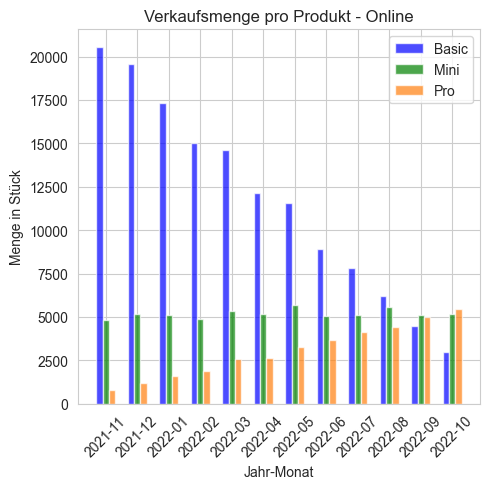

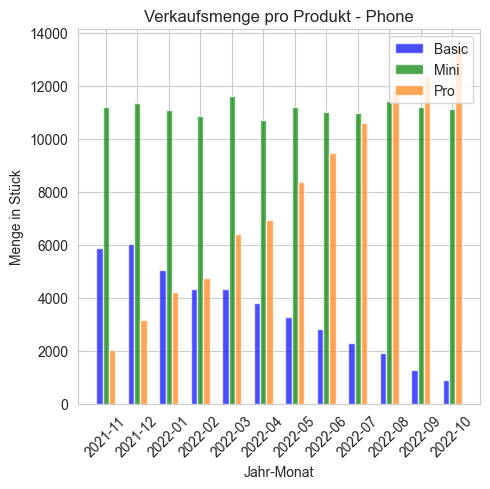

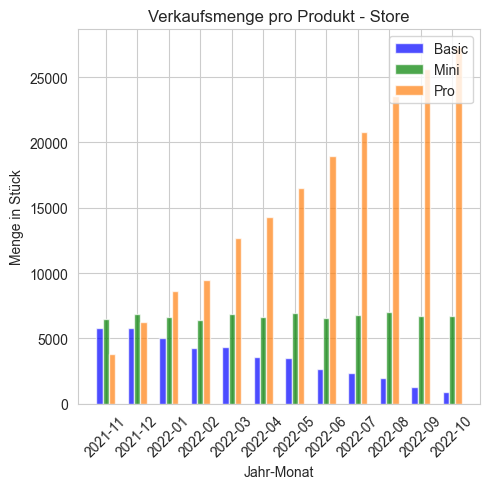

In [161]:
# Set the size of the plot
plt.figure(figsize=(5, 5))

# Extract year and month from the 'date' column
df_sales_online_monthly['year_month'] = df_sales_online_monthly['date'].dt.strftime('%Y-%m')

# Create a list of unique year_month values for x-axis
x_labels = df_sales_online_monthly['year_month'].unique()
x = np.arange(len(df_sales_online_monthly['date']))

# Define the width for each bar
bar_width = 0.2

# Create the bar plots for each sales channel
plt.bar(x - bar_width, df_sales_online_basic_monthly['amount'], width=bar_width, label='Basic', color='b', alpha=0.7)
plt.bar(x, df_sales_online_mini_monthly['amount'], width=bar_width, label='Mini', color='g', alpha=0.7)
plt.bar(x + bar_width, df_sales_online_pro_monthly['amount'], width=bar_width, label='Pro', color='tab:orange', alpha=0.7)

# Enhance the plot with titles and labels
plt.title('Verkaufsmenge pro Produkt - Online')
plt.xlabel('Jahr-Monat')
plt.ylabel('Menge in Stück')

# Set x-axis ticks and labels to be the dates
plt.xticks(x, x_labels, rotation=45)

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

# Set the size of the plot
plt.figure(figsize=(5, 5))

# Extract year and month from the 'date' column
df_sales_online_monthly['year_month'] = df_sales_online_monthly['date'].dt.strftime('%Y-%m')

# Create a list of unique year_month values for x-axis
x_labels = df_sales_online_monthly['year_month'].unique()
x = np.arange(len(df_sales_online_monthly['date']))

# Define the width for each bar
bar_width = 0.2

# Create the bar plots for each sales channel
plt.bar(x - bar_width, df_sales_phone_basic_monthly['amount'], width=bar_width, label='Basic', color='b', alpha=0.7)
plt.bar(x, df_sales_phone_mini_monthly['amount'], width=bar_width, label='Mini', color='g', alpha=0.7)
plt.bar(x + bar_width, df_sales_phone_pro_monthly['amount'], width=bar_width, label='Pro', color='tab:orange', alpha=0.7)

# Enhance the plot with titles and labels
plt.title('Verkaufsmenge pro Produkt - Phone')
plt.xlabel('Jahr-Monat')
plt.ylabel('Menge in Stück')

# Set x-axis ticks and labels to be the dates
plt.xticks(x, x_labels, rotation=45)

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

# Set the size of the plot
plt.figure(figsize=(5, 5))

# Extract year and month from the 'date' column
df_sales_online_monthly['year_month'] = df_sales_online_monthly['date'].dt.strftime('%Y-%m')

# Create a list of unique year_month values for x-axis
x_labels = df_sales_online_monthly['year_month'].unique()
x = np.arange(len(df_sales_online_monthly['date']))

# Define the width for each bar
bar_width = 0.2

# Create the bar plots for each sales channel
plt.bar(x - bar_width, df_sales_store_basic_monthly['amount'], width=bar_width, label='Basic', color='b', alpha=0.7)
plt.bar(x, df_sales_store_mini_monthly['amount'], width=bar_width, label='Mini', color='g', alpha=0.7)
plt.bar(x + bar_width, df_sales_store_pro_monthly['amount'], width=bar_width, label='Pro', color='tab:orange', alpha=0.7)

# Enhance the plot with titles and labels
plt.title('Verkaufsmenge pro Produkt - Store')
plt.xlabel('Jahr-Monat')
plt.ylabel('Menge in Stück')

# Set x-axis ticks and labels to be the dates
plt.xticks(x, x_labels, rotation=45)

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

Was wir sehen können ist das die einzelnen Produkte in alle Vertriebskanälen denselben Trend aufweisen. Doch ist ihre Absatzmengen komplett unterschiedlich weswegen z.B. der online Vertriebskanal eine sinkende Absatzmenge hat da es deutlich vom Tablet Basic dominiert wird und dieses eine starken Absatz Rückgang verzeichnet. 

#### Aufteilung der Verkaufkänäle in Regionen

Um sicherzustellen, das die Analyse oben nicht durch die Regionen beeinflusst wurde nehmen wir nun noch die Regionen mit in die Analyse auf. Vielleicht sind die Vertriebskanäle ja sehr unterschiedlich stark in jeder Region.

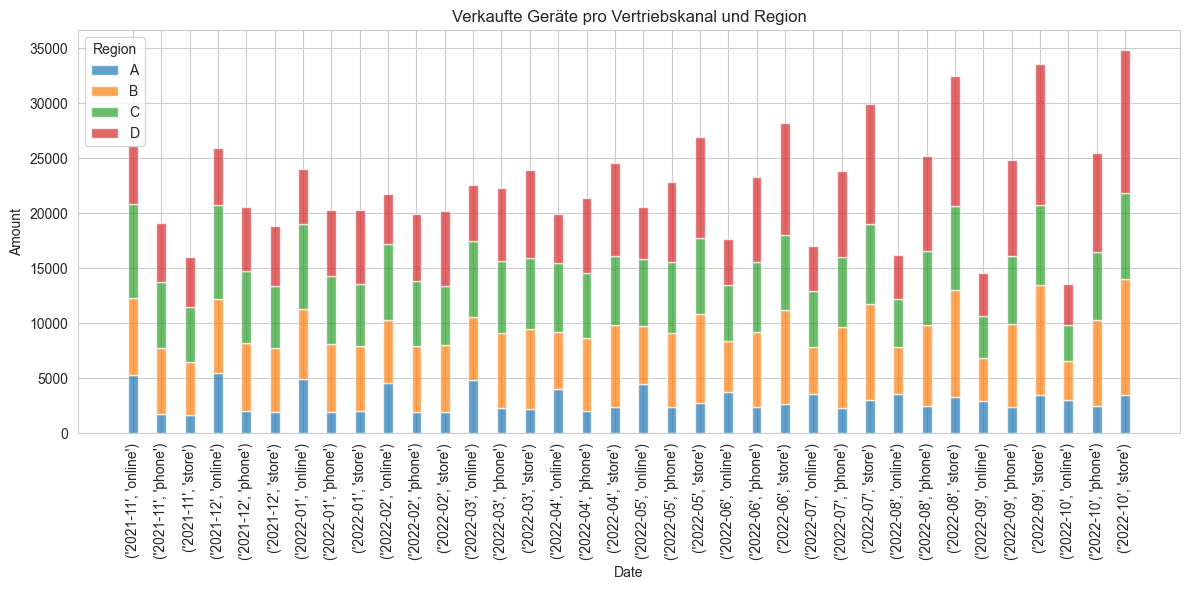

In [162]:
# Annahme: Ihre DataFrame 'df_sales' enthält Spalten 'date', 'region', 'amount'

# Extrahieren Sie den Monat und das Jahr aus der 'date'-Spalte
df_sales['month_year'] = df_sales['date'].dt.strftime('%Y-%m')

# Gruppieren Sie Ihre Daten nach 'month_year' und 'region' und summieren Sie die Werte
grouped_data = df_sales.groupby(['month_year', 'channel', 'region'])['amount'].sum().unstack(fill_value=0)

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the x-axis values for each date
x_labels = grouped_data.index
x = np.arange(len(x_labels))

# Define the width for each bar
bar_width = 0.35

# Create the stacked bar plots for each region
bottom = np.zeros(len(x_labels))
regions = grouped_data.columns

for region in regions:
    plt.bar(x, grouped_data[region], width=bar_width, label=region, alpha=0.7, bottom=bottom)
    bottom += grouped_data[region]

# Enhance the plot with titles and labels
plt.title('Verkaufte Geräte pro Vertriebskanal und Region')
plt.xlabel('Date')
plt.ylabel('Amount')

# Set x-axis ticks and labels
plt.xticks(x, x_labels, rotation=90)

# Add legend
plt.legend(loc='upper left', title='Region')

# Show the plot
plt.tight_layout()
plt.show()

**Analyse der Verkaufte Geräte pro Vertriebskanal und Region**

Auch wenn die Statistiken aufgrund der vielen Parameter etwas schwer zu lesen ist lässt sich kein besonderer Zusammenhang zwischen dem vorher Analysieren Ergebnis und den Regionen feststellen.

## Rabatte

Wir schauen uns die Rabatte an und schauen ob wir unseren Umsatz vielleicht durch größere Rabatte senken und Analysieren welche Faktoren bestimmen welcher Kunde einen Rabatt bekommt und wie es sich im Beobachtungszeitraum entwickelt hat.

#### Durchschnittliche Rabatte pro Vertriebskanal in %

In [163]:
# Group by month and count sales
df_discounts_monthly = df_sales.groupby(df_sales['date'].dt.to_period('M'))['discount'].mean().reset_index()
df_discounts_online_monthly = df_sales_online.groupby(df_sales_online['date'].dt.to_period('M'))['discount'].mean().reset_index()
df_discounts_phone_monthly = df_sales_phone.groupby(df_sales_phone['date'].dt.to_period('M'))['discount'].mean().reset_index()
df_discounts_store_monthly = df_sales_store.groupby(df_sales_store['date'].dt.to_period('M'))['discount'].mean().reset_index()

df_discounts_monthly['date'] = df_discounts_monthly['date'].dt.to_timestamp()
df_discounts_online_monthly['date'] = df_discounts_online_monthly['date'].dt.to_timestamp()
df_discounts_phone_monthly['date'] = df_discounts_phone_monthly['date'].dt.to_timestamp()
df_discounts_store_monthly['date'] = df_discounts_store_monthly['date'].dt.to_timestamp()

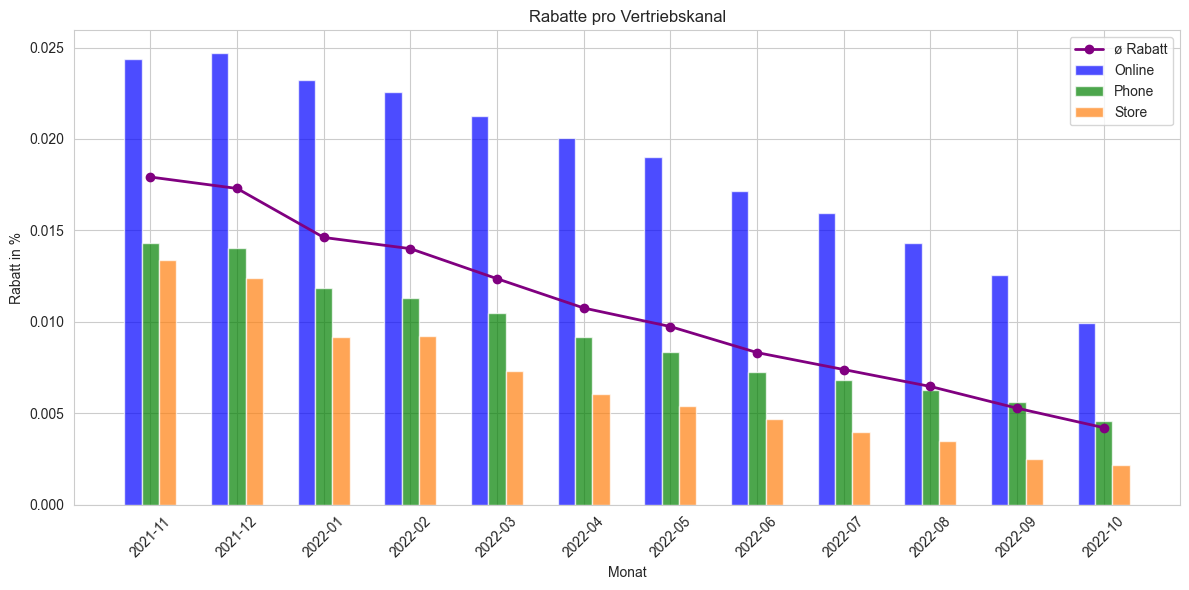

In [164]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Extract year and month from the 'date' column
df_discounts_online_monthly['year_month'] = df_discounts_online_monthly['date'].dt.strftime('%Y-%m')

# Create a list of unique year_month values for x-axis
x_labels = df_discounts_online_monthly['year_month'].unique()
x = np.arange(len(df_discounts_online_monthly['date']))

# Define the width for each bar
bar_width = 0.2

# Create the bar plots for each sales channel
plt.bar(x - bar_width, (df_discounts_online_monthly['discount']), width=bar_width, label='Online', color='b', alpha=0.7)
plt.bar(x, (df_discounts_phone_monthly['discount']), width=bar_width, label='Phone', color='g', alpha=0.7)
plt.bar(x + bar_width, (df_discounts_store_monthly['discount']), width=bar_width, label='Store', color='tab:orange', alpha=0.7)

# Plot the line plot using data from df_discounts_monthly
plt.plot(x, (df_discounts_monthly['discount']), label='ø Rabatt', color='purple', linewidth=2, marker='o')

# Enhance the plot with titles and labels
plt.title('Rabatte pro Vertriebskanal')
plt.xlabel('Monat')
plt.ylabel('Rabatt in %')

# Set x-axis ticks and labels to be the dates
plt.xticks(x, x_labels, rotation=45)

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

**Analyseergebnis der Rabatte pro Vertriebskanal**

Wir sehen das am meisten Rabatt im online Vertriebskanal gegeben wird und das durch die sinkende Absatzmenge online der durchschnitt sich immer mehr den anderen Vertriebskanälen annähert. Außerdem sehen wir das in allen Vertriebskanälen immer weniger Rabatte gegeben werden, was darauf schließen lässt das sich durch die Rabatte nicht unser Umsatz sinkt.

#### Durchschnittliche Rabatte pro Region in %

In [165]:
df_sales_A = df_sales[df_sales['region'] == 'A']
df_sales_B = df_sales[df_sales['region'] == 'B']
df_sales_C = df_sales[df_sales['region'] == 'C']
df_sales_D = df_sales[df_sales['region'] == 'D']

In [166]:
# Group by month and count sales
df_discounts_A_monthly = df_sales_A.groupby(df_sales_A['date'].dt.to_period('M'))['discount'].mean().reset_index()
df_discounts_B_monthly = df_sales_B.groupby(df_sales_B['date'].dt.to_period('M'))['discount'].mean().reset_index()
df_discounts_C_monthly = df_sales_C.groupby(df_sales_C['date'].dt.to_period('M'))['discount'].mean().reset_index()
df_discounts_D_monthly = df_sales_D.groupby(df_sales_D['date'].dt.to_period('M'))['discount'].mean().reset_index()

df_discounts_A_monthly['date'] = df_discounts_A_monthly['date'].dt.to_timestamp()
df_discounts_B_monthly['date'] = df_discounts_B_monthly['date'].dt.to_timestamp()
df_discounts_C_monthly['date'] = df_discounts_C_monthly['date'].dt.to_timestamp()
df_discounts_D_monthly['date'] = df_discounts_D_monthly['date'].dt.to_timestamp()

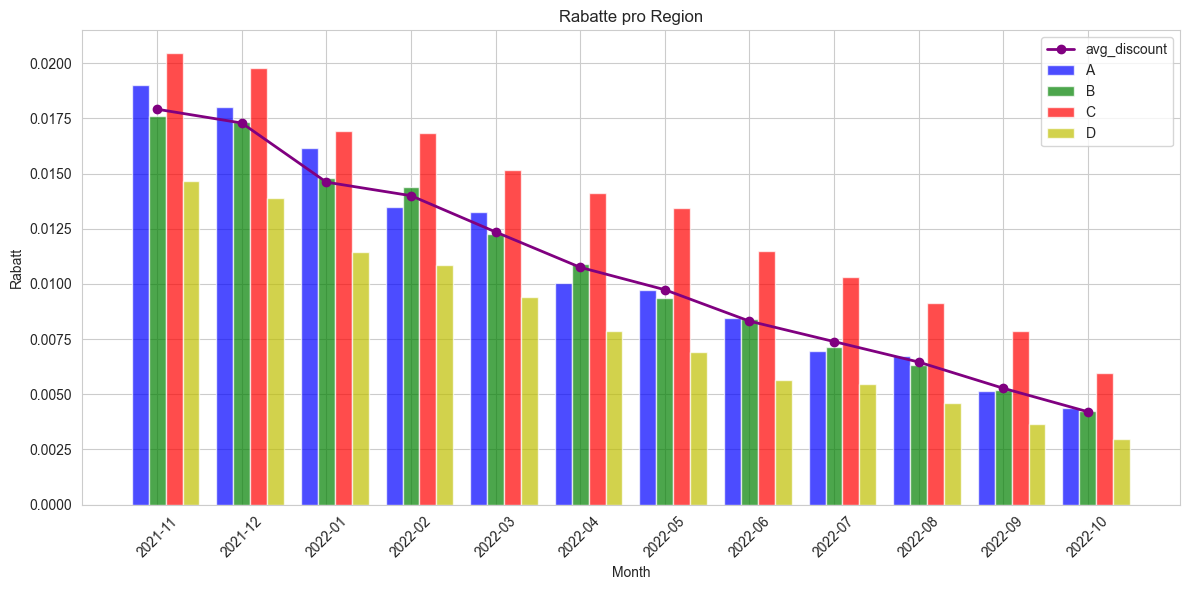

In [167]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Extract year and month from the 'date' column
df_discounts_online_monthly['year_month'] = df_discounts_online_monthly['date'].dt.strftime('%Y-%m')

# Create a list of unique year_month values for x-axis
x_labels = df_discounts_online_monthly['year_month'].unique()
x = np.arange(len(df_discounts_online_monthly['date']))

# Define the width for each bar
bar_width = 0.2

# Create the bar plots for each sales channel
plt.bar(x - bar_width, (df_discounts_A_monthly['discount']), width=bar_width, label='A', color='b', alpha=0.7)
plt.bar(x, (df_discounts_B_monthly['discount']), width=bar_width, label='B', color='g', alpha=0.7)
plt.bar(x + bar_width, (df_discounts_C_monthly['discount']), width=bar_width, label='C', color='r', alpha=0.7)
plt.bar(x + (2 * bar_width), (df_discounts_D_monthly['discount']), width=bar_width, label='D', color='y', alpha=0.7)

# Plot the line plot using data from df_discounts_monthly
plt.plot(x, (df_discounts_monthly['discount']), label='avg_discount', color='purple', linewidth=2, marker='o')

# Enhance the plot with titles and labels
plt.title('Rabatte pro Region')
plt.xlabel('Month')
plt.ylabel('Rabatt')

# Set x-axis ticks and labels to be the dates
plt.xticks(x, x_labels, rotation=45)

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

**Analyseergebnis der Rabatte pro Region**

Wir sehen das mehr Rabatte in der Region C gegeben werden, aber wenn wir uns die Y Achse anschauen sehen das zwischen den Regionen wirklich nicht viel Unterschied ist. Maximal ein halber Prozentpunkt liegt zwischen ihnen. Wir sehen das der Trend zu weniger Rabatten sich hier auch abzeichnet.

#### Durchschnittliche Rabatte pro Produkt in %

In [168]:
df_sales_basic = df_sales[df_sales['product'] == 'Tablet Basic']
df_sales_mini = df_sales[df_sales['product'] == 'Tablet Mini']
df_sales_pro = df_sales[df_sales['product'] == 'Tablet Pro']

In [169]:
# Group by month and count sales
df_discounts_basic_monthly = df_sales_basic.groupby(df_sales_basic['date'].dt.to_period('M'))['discount'].mean().reset_index()
df_discounts_mini_monthly = df_sales_mini.groupby(df_sales_mini['date'].dt.to_period('M'))['discount'].mean().reset_index()
df_discounts_pro_monthly = df_sales_pro.groupby(df_sales_pro['date'].dt.to_period('M'))['discount'].mean().reset_index()

df_discounts_basic_monthly['date'] = df_discounts_basic_monthly['date'].dt.to_timestamp()
df_discounts_mini_monthly['date'] = df_discounts_mini_monthly['date'].dt.to_timestamp()
df_discounts_pro_monthly['date'] = df_discounts_pro_monthly['date'].dt.to_timestamp()

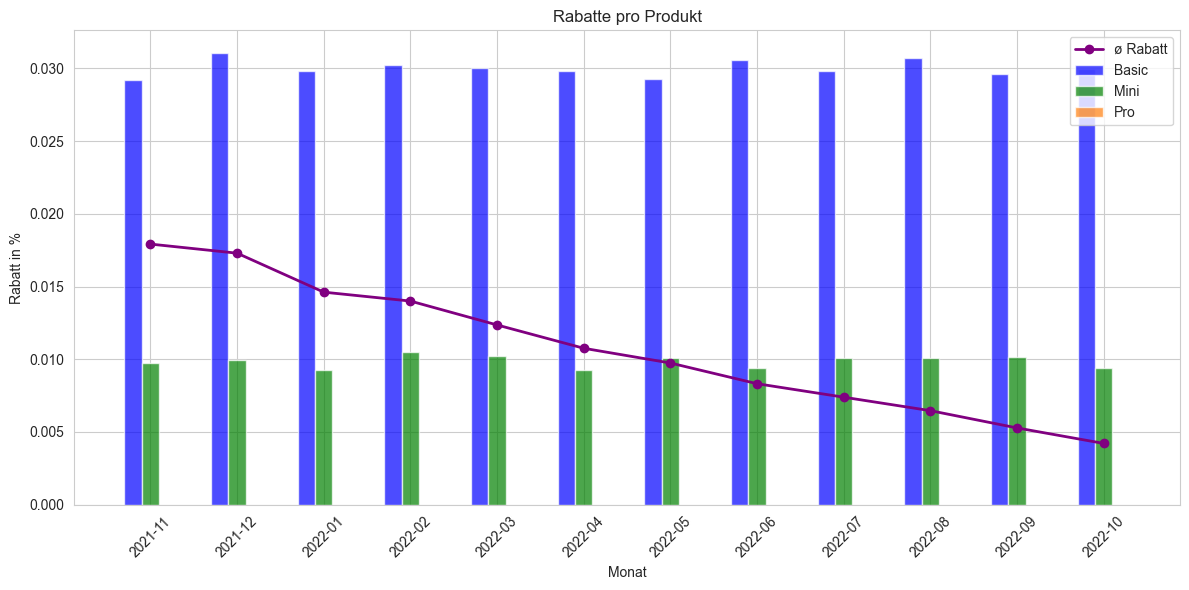

In [170]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Extract year and month from the 'date' column
df_discounts_online_monthly['year_month'] = df_discounts_online_monthly['date'].dt.strftime('%Y-%m')

# Create a list of unique year_month values for x-axis
x_labels = df_discounts_online_monthly['year_month'].unique()
x = np.arange(len(df_discounts_online_monthly['date']))

# Define the width for each bar
bar_width = 0.2

# Create the bar plots for each sales channel
plt.bar(x - bar_width, (df_discounts_basic_monthly['discount']), width=bar_width, label='Basic', color='b', alpha=0.7)
plt.bar(x, (df_discounts_mini_monthly['discount']), width=bar_width, label='Mini', color='g', alpha=0.7)
plt.bar(x + bar_width, (df_discounts_pro_monthly['discount']), width=bar_width, label='Pro', color='tab:orange', alpha=0.7)

# Plot the line plot using data from df_discounts_monthly
plt.plot(x, (df_discounts_monthly['discount']), label='ø Rabatt', color='purple', linewidth=2, marker='o')

# Enhance the plot with titles and labels
plt.title('Rabatte pro Produkt')
plt.xlabel('Monat')
plt.ylabel('Rabatt in %')

# Set x-axis ticks and labels to be the dates
plt.xticks(x, x_labels, rotation=45)

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

**Analyseergebnis der Rabatte pro Produkt**

Wir sehen hier das keine Rabatte auf das Tablet Pro gegeben werden, im Durchschnitt 1% auf das Tablett Mini und ca. 3% auf das Tablet Basic. Wir sehen außerdem das die Rabatte über die Zeit konstant sind und sich nicht verändern und somit nicht dem Trend der vorangegangenen Analysen folgen und somit auch nicht dem durchschnittlichen Rabatt folgen. Das bedeutet das der Trend der sinkenden Rabatte nur durch die Veränderungen in den abgesetzten Produkten entsteht und deswegen nicht der Grund für den sinkenden Umsatz ist.

## Downtime

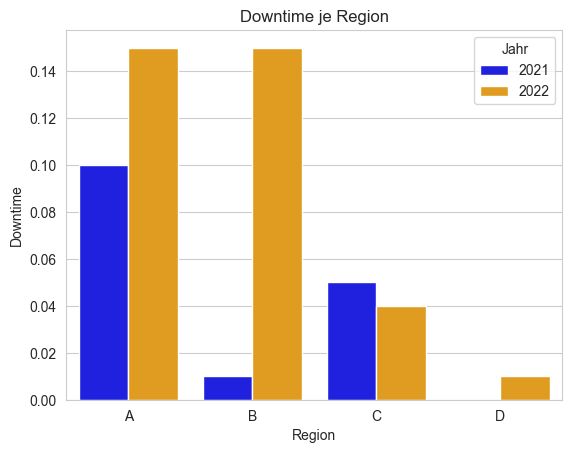

In [171]:
# df_downtime als Saeulendiagramm darstellen
sns.set_style("whitegrid")

# Farbpalette definieren (Blau für 2021, Orange für 2022)
colors = ["blue", "orange"]

# Saeulendiagramm erstellen
ax = sns.barplot(x="region", y="downtime", hue="year", data=df_downtime, palette=colors)

# Achsenbeschriftung
ax.set_xlabel("Region")
ax.set_ylabel("Downtime")

# Legende
ax.legend(title="Jahr", loc="upper right")

# Titel
ax.set_title("Downtime je Region")

# Diagramm anzeigen
plt.show()

In [172]:
df_sales_A = df_sales_online[df_sales_online['region'] == 'A']
df_sales_B = df_sales_online[df_sales_online['region'] == 'B']
df_sales_C = df_sales_online[df_sales_online['region'] == 'C']
df_sales_D = df_sales_online[df_sales_online['region'] == 'D']

# Group by month and count sales
df_discounts_A_monthly = df_sales_A.groupby(df_sales_A['date'].dt.to_period('M'))['amount'].count().reset_index()
df_discounts_B_monthly = df_sales_B.groupby(df_sales_B['date'].dt.to_period('M'))['amount'].count().reset_index()
df_discounts_C_monthly = df_sales_C.groupby(df_sales_C['date'].dt.to_period('M'))['amount'].count().reset_index()
df_discounts_D_monthly = df_sales_D.groupby(df_sales_D['date'].dt.to_period('M'))['amount'].count().reset_index()

df_discounts_A_monthly['date'] = df_discounts_A_monthly['date'].dt.to_timestamp()
df_discounts_B_monthly['date'] = df_discounts_B_monthly['date'].dt.to_timestamp()
df_discounts_C_monthly['date'] = df_discounts_C_monthly['date'].dt.to_timestamp()
df_discounts_D_monthly['date'] = df_discounts_D_monthly['date'].dt.to_timestamp()

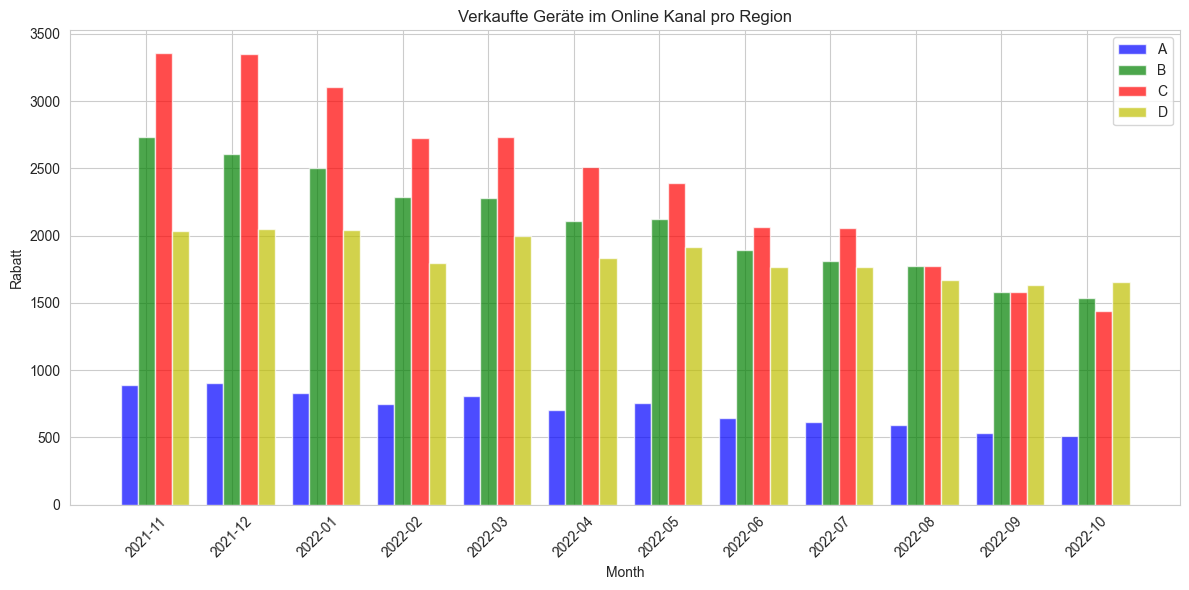

In [173]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Extract year and month from the 'date' column
df_discounts_online_monthly['year_month'] = df_discounts_online_monthly['date'].dt.strftime('%Y-%m')

# Create a list of unique year_month values for x-axis
x_labels = df_discounts_online_monthly['year_month'].unique()
x = np.arange(len(df_discounts_online_monthly['date']))

# Define the width for each bar
bar_width = 0.2

# Create the bar plots for each sales channel
plt.bar(x - bar_width, (df_discounts_A_monthly['amount']), width=bar_width, label='A', color='b', alpha=0.7)
plt.bar(x, (df_discounts_B_monthly['amount']), width=bar_width, label='B', color='g', alpha=0.7)
plt.bar(x + bar_width, (df_discounts_C_monthly['amount']), width=bar_width, label='C', color='r', alpha=0.7)
plt.bar(x + (2 * bar_width), (df_discounts_D_monthly['amount']), width=bar_width, label='D', color='y', alpha=0.7)


# Enhance the plot with titles and labels
plt.title('Verkaufte Geräte im Online Kanal pro Region')
plt.xlabel('Month')
plt.ylabel('Rabatt')

# Set x-axis ticks and labels to be the dates
plt.xticks(x, x_labels, rotation=45)

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

**Analyse der Downtime**

Leider haben wir mit nur zwei Datenpunkten nicht genug Information um den Einfluss der Downtime auf denn Absatz im Onlinestore bewerten zu können. Wenn man sich den Online Absatz über den Jahreswechsel anschaut sieht man keine ungewöhnlich große Veränderung in den einzelnen Regionen die sich mit der Downtime erklären lassen würde.

# 10. Analyse der Performance der Regionen

In diesem Abschnitt werden die Regionen auf ihre Performance untersucht. Hierfür werden die Umsätze, die Kosten und die Gewinne der Regionen analysiert. Außerdem gucken wir uns genau an wie sich die Verkaufskanäle in den Regionen entwickeln und ob es einen Zusammenhang zwischen den Kanälen und der wirtschaftlichen Leistung der Regionen gibt.

### Datenaufbereitung: 

Für die Analyse waren viele verschiedene Datensätze notwendig. Diese wurden in diesem Abschnitt zusammengeführt und aufbereitet. <br>
Das erste DF gruppiert den totalen Gewinn nach Regionen, Produkten und Kanälen. Diese werden durch eine Million geteilt für eine angenehmere Darstellung in den späteren Diagrammen. <br>
Das nächste DF gruppiert die gesamte Verkaufsmenge nach den einzelnen Regionen und den einzelnen Produkten <br>
Die restlichen DFs wurden für jede Region einzeln erstellt. Für jede Region wurden die Verkaufsmengen über den gesamten Zeitraum aggregiert und nach den unterschiedlichen Kanälen gruppiert. <br>

In [174]:
# Gewinn pro Region, Produkt und Kanal
profit_per_region_product_channel = df_sales.groupby(['region', 'product', 'channel'])['profit_total'].sum()/1_000_000
profit_per_region_product_channel = profit_per_region_product_channel.reset_index()
profit_per_region_product_channel = profit_per_region_product_channel.replace({'product': {'Tablet Basic': 'Basic', 'Tablet Mini': 'Mini', 'Tablet Pro': 'Pro'}})

# Verkaufsmenge pro Region und Produkt
sales_per_product_by_region = df_sales.groupby(['region', 'product']).agg({'amount': 'sum'})
sales_per_product_by_region = sales_per_product_by_region.reset_index()

#Verkaufte Menge pro Region und Produkt
df_sales_region_channel = df_sales.groupby(["year", "month", 'region', 'channel']).agg({"amount" : "sum"})
df_sales_region_channel.reset_index(inplace=True)

#Region A
df_sales_region_channel_a = df_sales_region_channel[df_sales_region_channel['region'] == 'A']
df_sales_region_channel_a_online = df_sales_region_channel_a[df_sales_region_channel_a['channel'] == 'online']
df_sales_region_channel_a_phone = df_sales_region_channel_a[df_sales_region_channel_a['channel'] == 'phone']
df_sales_region_channel_a_store = df_sales_region_channel_a[df_sales_region_channel_a['channel'] == 'store']

#Region B
df_sales_region_channel_b = df_sales_region_channel[df_sales_region_channel['region'] == 'B']
df_sales_region_channel_b_online = df_sales_region_channel_b[df_sales_region_channel_b['channel'] == 'online']
df_sales_region_channel_b_phone = df_sales_region_channel_b[df_sales_region_channel_b['channel'] == 'phone']
df_sales_region_channel_b_store = df_sales_region_channel_b[df_sales_region_channel_b['channel'] == 'store']

#Region C
df_sales_region_channel_c = df_sales_region_channel[df_sales_region_channel['region'] == 'C']
df_sales_region_channel_c_online = df_sales_region_channel_c[df_sales_region_channel_c['channel'] == 'online']
df_sales_region_channel_c_phone = df_sales_region_channel_c[df_sales_region_channel_c['channel'] == 'phone']
df_sales_region_channel_c_store = df_sales_region_channel_c[df_sales_region_channel_c['channel'] == 'store']

#Region D
df_sales_region_channel_d = df_sales_region_channel[df_sales_region_channel['region'] == 'D']
df_sales_region_channel_d_online = df_sales_region_channel_d[df_sales_region_channel_d['channel'] == 'online']
df_sales_region_channel_d_phone = df_sales_region_channel_d[df_sales_region_channel_d['channel'] == 'phone']
df_sales_region_channel_d_store = df_sales_region_channel_d[df_sales_region_channel_d['channel'] == 'store']

## Alle Regionen

In diesem Teil gucken wir uns Umsatz und Verkaufsmengen Werte der einzelnen Regionen in einer gemeinsamen Darstellung an.

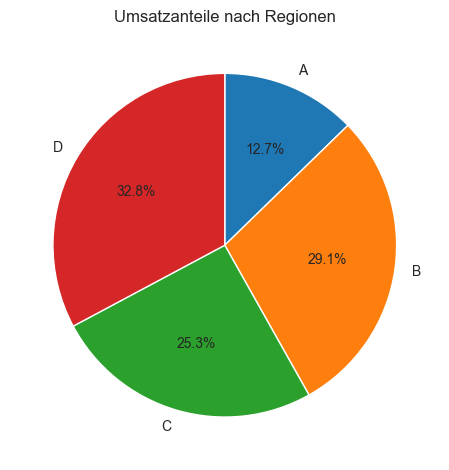

In [175]:
plt.pie(df_sales_per_region, labels=df_sales_per_region.index, autopct='%1.1f%%', counterclock=False, startangle=90)
plt.title('Umsatzanteile nach Regionen')

plt.tight_layout()
plt.show()

Das hier zusehende Kreisdiagramm zeigt an wie viel jede Region zum Gesamtumsatz beiträgt. <br>
In einem Optimalfall würden alle Regionen ungefähr gleich viel zum Gesamtumsatz beitragen, <br> da wir die Annahme haben das alle Regionen systematisch gleich sind und in jeder Region die gleichen Produkte über die gleichen Vertriebskanäle verkauft werden. <br>
Das ist hier jedoch nicht der Fall. <br>
Es fällt besonders auf, dass die Region A einen fast dreifach kleineren Umsatzanteil hat als die Region D. <br>
Der Unterschied in den Anteilen der anderen Regionen ist dabei im Vergleich weitaus weniger stark, hier liegen die Unterschiede in einem Bereich von 3% bis 5% Umsatzanteil. <br>
Diese Werte liegen schon näher dran am Optimalfall, dass alle Regionen gleich große Anteile haben. <br>
Von A zu C, die drittschlechteste Region, ist der Unterschied allein schon 12.6% <br>
Für die folgenden Analysen werden uns die Regionen A und D wahrscheinlich am meisten helfen, da sie unsere Extremwerte sind. <br>

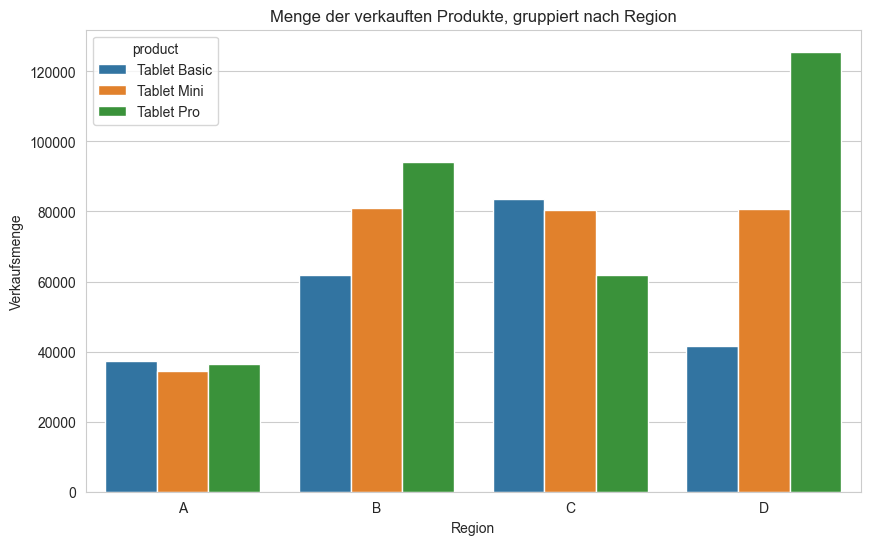

In [176]:
plt.figure(figsize=(10, 6))

sns.barplot(data=sales_per_product_by_region, x='region', y='amount', hue='product')

plt.title('Menge der verkauften Produkte, gruppiert nach Region')
plt.xlabel('Region')
plt.ylabel('Verkaufsmenge')
plt.show()

Das Balkendiagramm zeigt für jede Region die Verkaufsmengen der einzelnen Produkte. <br>
Die Extrema sind hier die Mengenwerte von dem Tablet Mini in der Region A, ungefähr 37000 Stück und dem Tablet Pro in der Region D mit ungefähr 123000 Stück. <br>
Region A hat hier über alle Produkte hinweg die geringsten Verkaufsmengen, was nicht verwunderlich ist, da sie auch den geringsten Umsatzanteil hat. <br>
Die Balken von Region B und C sind hier symmetrisch, wo bei B einen größeren Höchstwert hat, mit dem Tablet Pro.<br>
Obwohl Region D den größten Umsatzanteil hat, ist die Verteilung der Verkaufsmengen weitaus ungleichmäßiger als bei B und C. <br>
Insbesondere die schlechten Verkaufsmengen des Tablet Basic fallen hier auf, die schon fast auf einer gleichen Stufe ist wie mit einem Balken aus der Region A.<br>
Die schlechte Performance wird aber durch die sehr guten Verkaufsmengen des Tablet Pro ausgeglichen, was auch unser Maximum ist. <br>
Mit dem Hintergrundwissen, dass das Produkt Pro auch am meisten Umsatz bringt, ist es nicht verwunderlich, dass die Region D den größten Umsatzanteil hat. <br>
Interresant ist auch das Tablet Mini was über die Regionen B, C und D gleich groß ist, also an sich ein Normalverhalten für das Verkaufsvolumen zeigt, <br>
dass aber in der Region A nicht stattfindet. <br>

Insgesamt bildet sich hier die Fragestellung: Warum ist die Performance der Regionen so unterschiedlich? <br>
Mit dem Fokus auf die Regionen A, da sie als Underperformer besonders auffält. <br>
Um das genauer zu untersuchen werden wir uns die einzelnen Regionen detailierter anschauen.

## Funktionen:

Die folgenden Funktionen wurden speziell für die Erstellung der folgenden Diagramme gebaut. <br>
Sie dienen nur der einfachen Redundanzvermeidung und sind schwer wiederzuverwenden in Bereichen außerhalb dieses Abschnittes.<br>

In [ ]:
def plot_profit_per_product_channel_region(region_costs, profit_per_region_product_channel):
    # Iteration über die einzelnen Regionen
    for region_cost in region_costs:
        # Filtern der Daten für die aktuelle Region
        region_data = profit_per_region_product_channel[profit_per_region_product_channel['region'] == region_cost]
        
        # Diagramm erstellen
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # Erstellen der x-Achsenbeschriftungen für das Säulendiagramm
        products = region_data['product']
        channels = region_data['channel']
        labels = [f'{product} - {channel}' for product, channel in zip(products, channels)]
        
        # Extrahieren der Gewinne
        profits = region_data['profit_total']
        
        # Festlegen der Farben für Basic, Mini und Pro
        colors = ['tab:orange' if product == 'Basic' else 'b' if product == 'Mini' else 'g' for product in products]
        
        # Erstellen des Säulendiagramms mit den entsprechenden Farben
        plt.bar(labels, profits, color=colors)
        
        # Achsentitel und Diagrammtitel
        plt.xlabel('Produkt und Kanal', size = 15)
        plt.ylabel('Profit in Mio. €', size = 15)
        plt.title(f'Profit pro Produkt & Kanal - Region {region_cost}', size = 20)
        
        # Anpassung des Layouts und Anzeigen des Diagramms
        plt.tight_layout()
        
        # Gitterlinien aktivieren
        plt.grid(True)

        # Legende anzeigen mit den entsprechenden Farben
        legend_elements = [mpatches.Patch(facecolor='tab:orange', label='Basic'),
                              mpatches.Patch(facecolor='b', label='Mini'),
                              mpatches.Patch(facecolor='g', label='Pro')]
        plt.legend(handles=legend_elements, loc='upper right', fontsize='large')

        # Gitter in den Hintergrund legen
        ax.set_axisbelow(True)
         
        # Anpassung x-Achse und y-Achse
        max = 22.5
        ticks = 2.5
        plt.xticks(rotation = 45)
        plt.yticks(np.arange(0, max, ticks))
        plt.show()
        
def plot_sales(region):
    # Erstellen der Datenframes für die einzelnen Kanäle
    df_sales_region_channel_online = globals()[f'df_sales_region_channel_{region.lower()}_online']
    df_sales_region_channel_phone = globals()[f'df_sales_region_channel_{region.lower()}_phone']
    df_sales_region_channel_store = globals()[f'df_sales_region_channel_{region.lower()}_store']

    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Daten plotten
    ax.plot(df_sales_region_channel_online['year'].astype(str) + '-' + df_sales_region_channel_online['month'].astype(str), df_sales_region_channel_online['amount'])
    ax.plot(df_sales_region_channel_phone['year'].astype(str) + '-' + df_sales_region_channel_phone['month'].astype(str), df_sales_region_channel_phone['amount'])
    ax.plot(df_sales_region_channel_store['year'].astype(str) + '-' + df_sales_region_channel_store['month'].astype(str), df_sales_region_channel_store['amount'])

    # Achsenbeschriftung und Titel hinzufuegen
    ax.set_xlabel('Jahr-Monat', fontsize=12)

    # y-Achse in Millionen formatieren
    ax.yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

    ax.set_ylabel('Menge in Stück', fontsize=12)
    ax.set_title(f'Verkaufsmenge nach Kanälen - Region {region}', fontsize=20)

    # Legende hinzufuegen
    ax.legend(['Online', 'Phone', 'Store'], fontsize=14)

    # X-Achsenbeschriftung drehen
    plt.xticks(rotation=45)

    # Diagramm anzeigen
    plt.tight_layout()
    plt.show()


## Region A

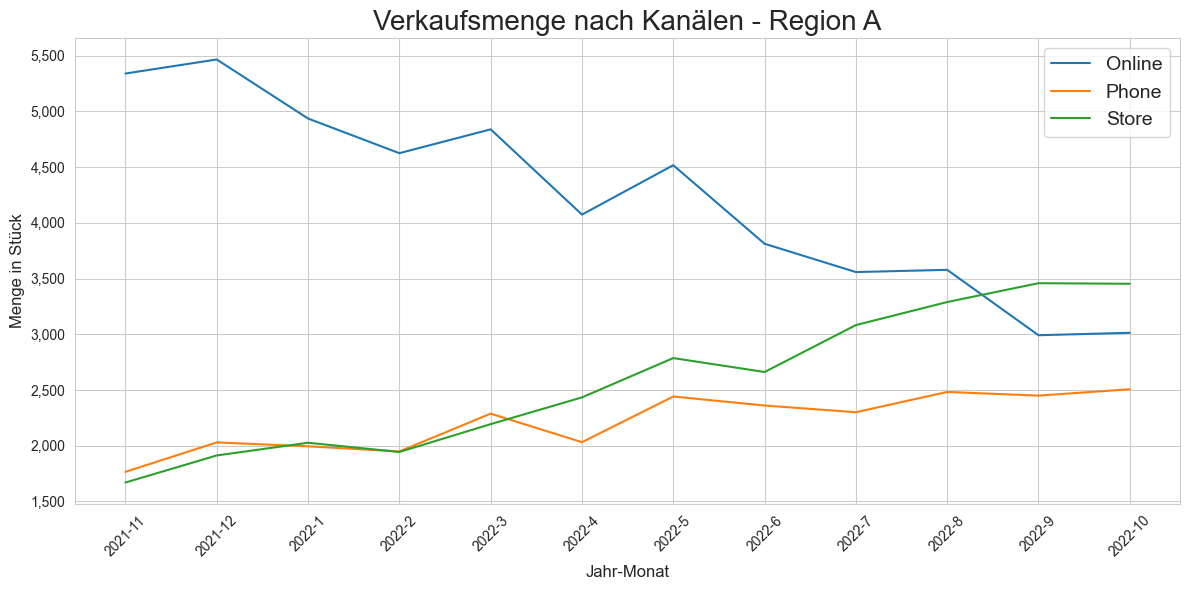

In [ ]:
plot_sales('A')


Das Graphendiagramm zeigt die Verkaufsmengen nach Vertriebskanälen für die Region A, in dem Zeitraum von November 2021 bis Oktober 2022. <br>
Der Online Kanal ist hier im Abwärtstrend, während der Phone und Store Kanal im Aufwärtstrend ist. <br>
Das zeigt hier das die allgemeinen Trends der Vertriebskanäle auch in der Region A stattfinden. <br>
Alle drei Graphen sind am Ende des Beobachtungszeitraums ungefähr gleich groß, mit einem Abstand von 1000 Stück <br>
Am Anfang des Beobachtungszeitraums ist der Online Kanal noch der größte Kanal mit einem sehr großen Abstand zu den beiden anderen Kanälen. <br>
Im Verlauf der Zeit wird der Abstand immer kleiner und am Ende des Beobachtungszeitraums ist der Store Kanal der größte Kanal. <br>
Zwischen dem 08/2022 und dem 9/2022 findet der Wendepunkt statt, wo der Graph des Online Kanals überholt wird vom Store Kanal. <br>
Die Beobachtung des Wendepunktes und wann der stattfindet, sollte uns mit dem späteren Vergleich der anderen Regionen helfen, Schlüsse für die schlechte Performance der Region A zu ziehen. <br>

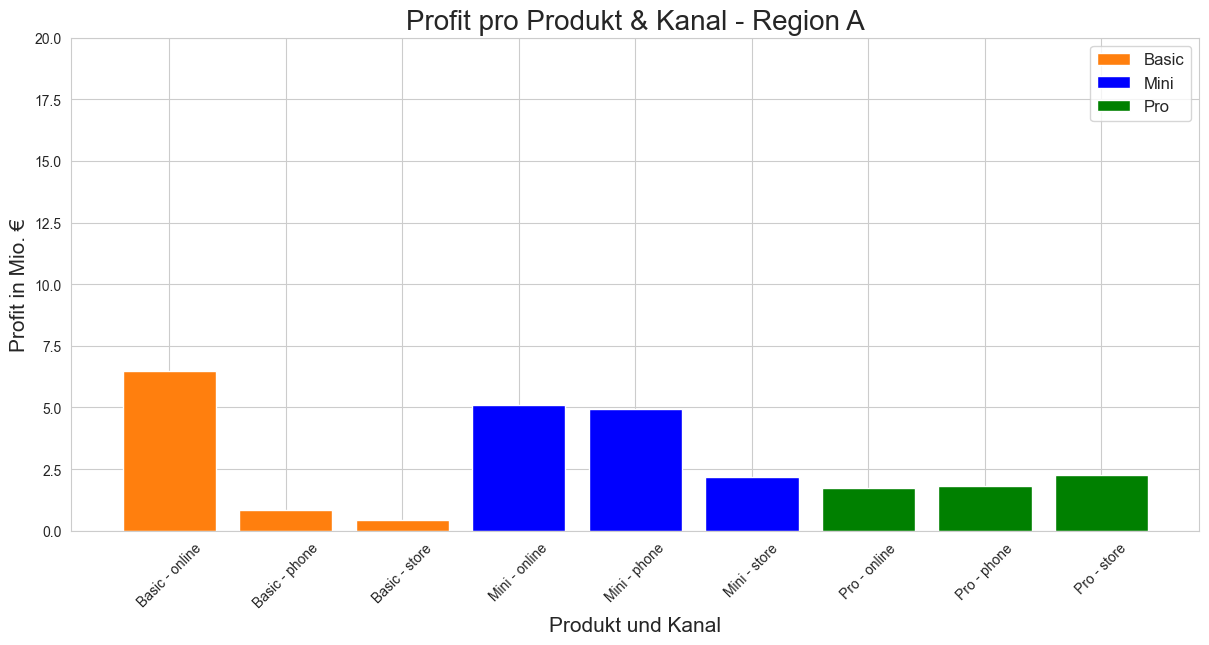

In [ ]:
region_costs = ["A"]  # replace with your actual regions
plot_profit_per_product_channel_region(region_costs, profit_per_region_product_channel)

Das Balkendiagramm zeigt den Gesamtprofit aufgeteilt nach den einzelnen Produkte und Vertriebskanälen in der Region A. <br>
Links das Tablet Basic, in der Mitte das Tablet Mini und rechts das Tablet Pro. <br>
Die Extrema sind hier als Maximum das Basic + Online mit 6.25 Millionen € und als Minimum das Basic + Online mit 0.3 Millionen €. <br>
Generell sind die Profitströme, Kanal und Produkt unabhängig, niedrig. <br>
Das Tablet Pro bringt über alle Kanäle hinweg wenig Profit, was in Zusammenhang mit den geringen Verkaufsmengen und hohen Produktionskosten stehen könnte. <br>
Der Online Kanal ist hier am profitabelsten, Basic und Mini bringen in diesem Kanal am meisten Profit und beim Pro ist der Kanal Unterschied sehr schmall <br>
Die Kombination Basic + Online ist hier eine der wichtigsten Profitstützen, wobei eine ähnliche Kombination bei Mini und Pro hier fehlt. <br>

Man erkennt hier gut, dass das schlechte Abschneiden der Region A an der unausgeschöpften Profitmöglichkeiten liegt, vor allem beim Tablet Pro. <br>

## Region B

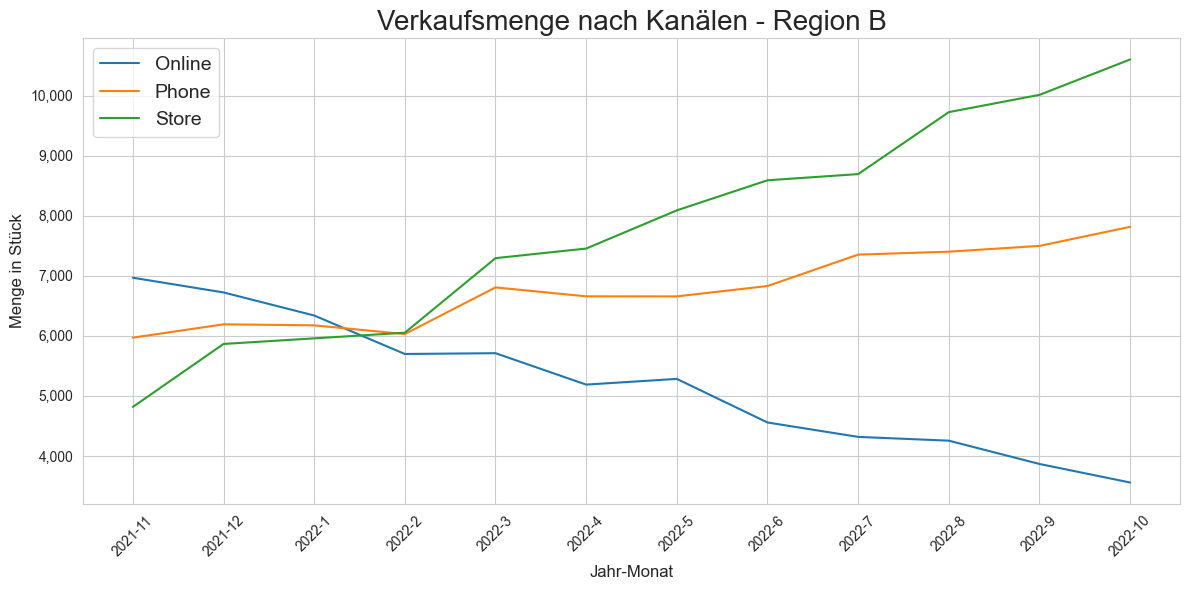

In [ ]:
plot_sales('B')

Das Graphendiagramm zeigt die Verkaufsmengen nach Vertriebskanälen für die Region B, in dem Zeitraum von November 2021 bis Oktober 2022. <br>
Der Online Kanal ist hier im Abwärtstrend, während der Phone und Store Kanal im Aufwärtstrend ist. <br>
Das zeigt hier das die allgemeinen Trends der Vertriebskanäle auch in der Region A stattfinden. <br>
Alle drei Graphen liegen am Ende des Beobachtungszeitraums weit auseinander, mit einem Abstand von 7000-8000 Stück <br>
Am Anfang des Beobachtungszeitraums liegen die Graphen noch sehr nah beieinander, mit einem Abstand von 2000 Stück. <br>
Der Online Kanal ist hier am Anfang des Beobachtungszeitraums der größte Kanal. <br>
Im Verlauf der Zeit wird der Abstand immer größer und am Ende des Beobachtungszeitraums ist der Store Kanal der größte Kanal. <br>
Zwischen dem 01/2022 und dem 2/2022 findet der Wendepunkt statt, wo der Graph des Online Kanals überholt wird vom Store und Phone Kanal. <br>
Das zeigt uns gut das der Wendepunkt hier viel früher, 7 Monate, stattfindet als in der Region A. <br>
Für das angezielte Normalverhalten der Regionen ist ein früherer Wendepunkt besser, da die Region weniger vom Abwärtstrend des Online Kanals betroffen ist. <br>

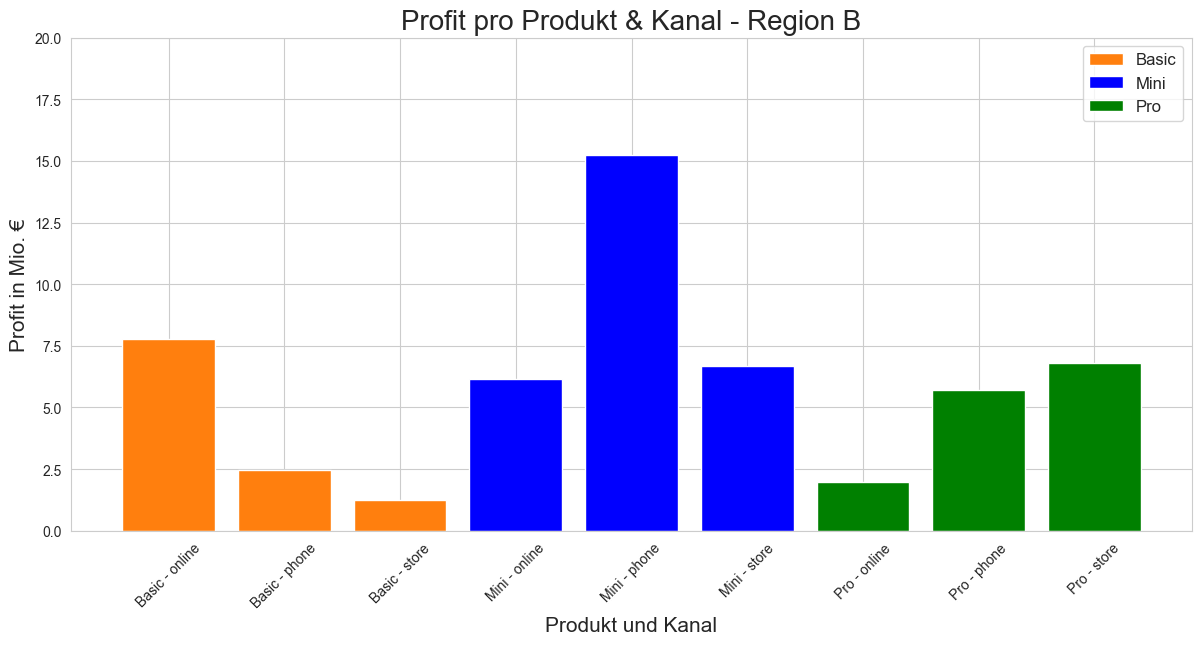

In [ ]:
region_costs = ["B"]  
plot_profit_per_product_channel_region(region_costs, profit_per_region_product_channel)

Das Balkendiagramm zeigt den Gesamtprofit aufgeteilt nach den einzelnen Produkte und Vertriebskanälen in der Region B. <br>
Links das Tablet Basic, in der Mitte das Tablet Mini und rechts das Tablet Pro. <br>
Die Extrema sind hier als Maximum das Mini + Phone mit 15 Millionen € und als Minimum das Basic + Store mit 1 Millionen €. <br>
Generell sind die Profitströme, hier sehr unterschiedlich verteilt, aber trotzdem in fast jeder Kombination höher als bei der Region A <br>

Die Kombination Mini + Phone und Pro + Store zeigen gut, was der Region A fehlt. <br>
Die drei Kombinationen Basic + Online, Mini + Phone und Pro + Store sind hier die wichtigsten Profitstützen, <br> wobei die erste Kombination im Verlauf des Beobachtungszeitraums immer mehr an Wert verlieren wird. <br>

## Region C

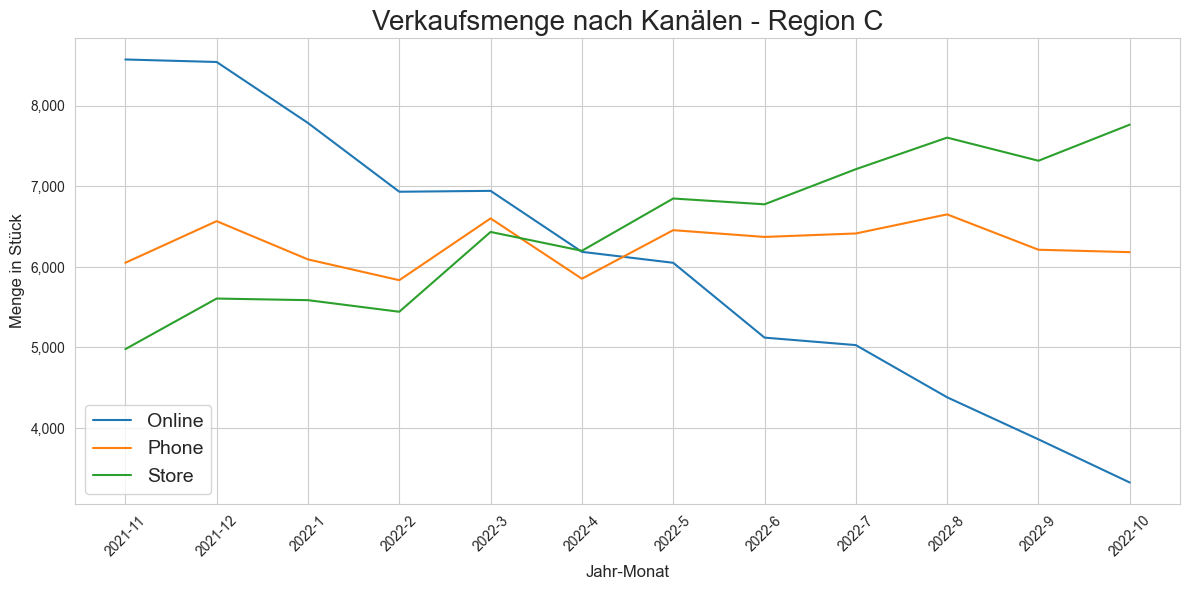

In [ ]:
plot_sales('C')

Das Graphendiagramm zeigt die Verkaufsmengen nach Vertriebskanälen für die Region C, in dem Zeitraum von November 2021 bis Oktober 2022. <br>
Der Online Kanal ist hier im Abwärtstrend, während der Phone und Store Kanal im Aufwärtstrend ist, wobei der Trend beim Phone Kanal eher schwach ausgeprägt ist <br>
Das zeigt hier das die allgemeinen Trends der Vertriebskanäle auch in der Region C stattfinden. <br>
Alle drei Graphen liegen am Ende des Beobachtungszeitraums weit auseinander, mit einem Abstand von 5000-6000 Stück. <br>
Am Anfang des Beobachtungszeitraums liegen die Graphen ebenso noch weit auseinander, mit einem Abstand von 5000 Stück. <br>
Der Online Kanal ist hier am Anfang des Beobachtungszeitraums der größte Kanal. <br>
Im Verlauf der Zeit wird der Abstand zunächst kleiner, bis der Wendepunkt erreicht wird, wonach der Abstand wieder größer wird, <br>
und am Ende des Beobachtungszeitraums ist der Store Kanal der größte Kanal. <br>
An Anfang vom 04/2022 findet der Wendepunkt statt, wo der Graph des Online Kanals überholt wird vom Store und Phone Kanal. <br>
Das zeigt uns gut das der Wendepunkt hier früher eintritt, als in der Region A, aber später als in der Region B, was den Unterschied beim Kreisdiagramm erklären könnte.<br>
Für das angezielte Normalverhalten der Regionen ist ein früherer Wendepunkt besser, da die Region weniger vom Abwärtstrend des Online Kanals betroffen ist. <br>

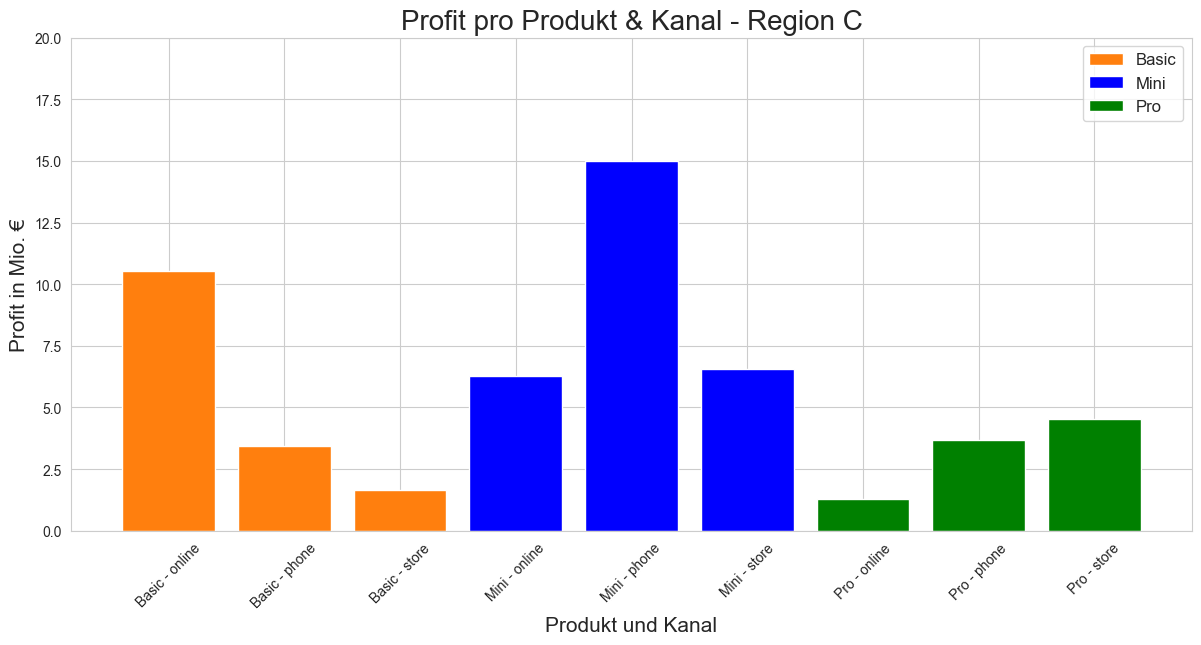

In [ ]:
region_costs = ["C"] 
plot_profit_per_product_channel_region(region_costs, profit_per_region_product_channel)

Das Balkendiagramm zeigt den Gesamtprofit aufgeteilt nach den einzelnen Produkte und Vertriebskanälen in der Region C. <br>
Links das Tablet Basic, in der Mitte das Tablet Mini und rechts das Tablet Pro. <br>
Die Extrema sind hier als Maximum das Mini + Phone mit 15 Millionen € und als Minimum das Basic + Store mit 1 Millionen €. <br>
Generell sind die Profitströme, hier sehr unterschiedlich verteilt, aber trotzdem in fast jeder Kombination höher als bei der Region A. <br>

Die Kombination Mini + Phone und Pro + Store zeigen wieder gut, was der Region A fehlt, vorallem da C an dritter Stelle steht bei den Umsatzanteilen. <br>
Die drei Kombinationen Basic + Online, Mini + Phone und Pro + Store sind hier die wichtigsten Profitstützen, <br> wobei die erste Kombination im Verlauf des Beobachtungszeitraums immer mehr an Wert verlieren wird. <br>

Das Diagramm ist sehr ähnlich zu B, wobei die Kombination Pro + Store noch nicht so hoch ist und die Kombination Basic + Online noch höher ist. <br>
Höchstwahrscheinlich liegt der Grund am später stattfindenden Wendepunkt in der Region C als bei der Region B. <br>

## Region D

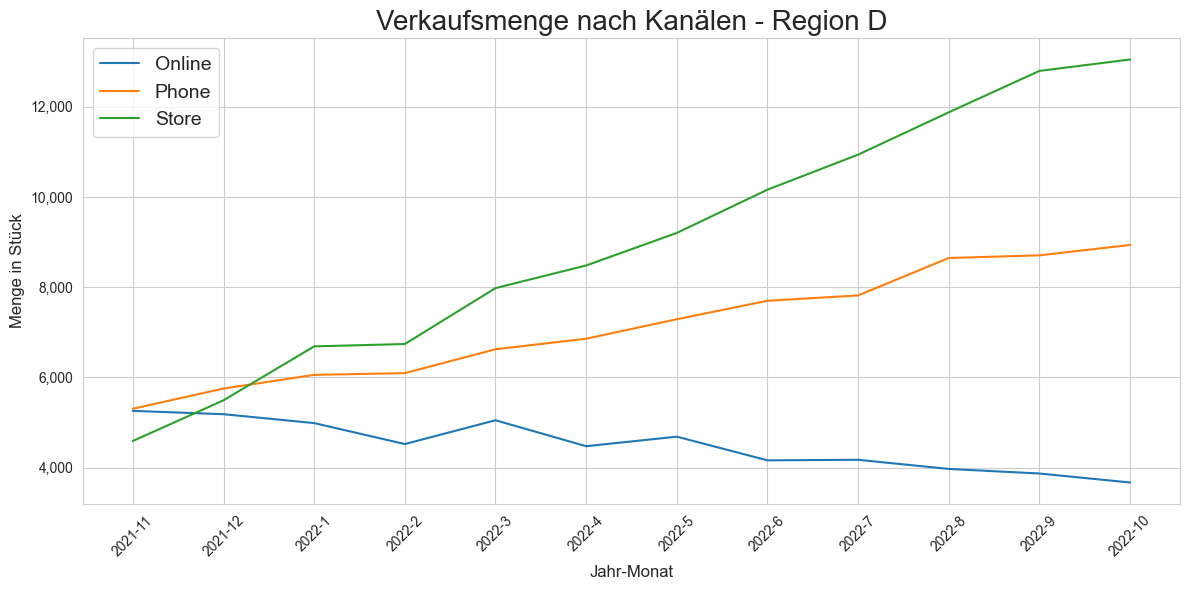

In [ ]:
plot_sales('D')

Das Graphendiagramm zeigt die Verkaufsmengen nach Vertriebskanälen für die Region D, in dem Zeitraum von November 2021 bis Oktober 2022. <br>
Der Online Kanal ist hier im Abwärtstrend, während der Phone und Store Kanal im Aufwärtstrend ist, wobei der Trend beim Online Kanal eher schwach ausgeprägt ist <br>
Das zeigt hier das die allgemeinen Trends der Vertriebskanäle auch in der Region D stattfinden. <br>
Alle drei Graphen liegen am Ende des Beobachtungszeitraums weit auseinander, mit einem Abstand von 9000-10000 Stück, die höchste von allen Regionen.<br>
Am Anfang des Beobachtungszeitraums liegen die Graphen noch sehr nah beieinander, mit einem Abstand von 1000 Stück. <br>
Der Online Kanal ist hier am Anfang des Beobachtungszeitraums nicht der größte Kanal, da der schon beobachtete Wendepunkt hier direkt am Anfang eingetreten ist. <br>
Im Verlauf der Zeit wird der Abstand immer größer und am Ende des Beobachtungszeitraums ist der Store Kanal der größte Kanal. <br>
An Anfang vom 11/2021 findet der Wendepunkt statt, wahrscheinlich sogar früher, da der Graph des Online Kanals schon niedriger ist als der des Phone Kanals. <br>
Das zeigt uns gut das der Wendepunkt hier am frühesten eintritt, was den großen Umsatzanteil der Region D erklären könnte <br>

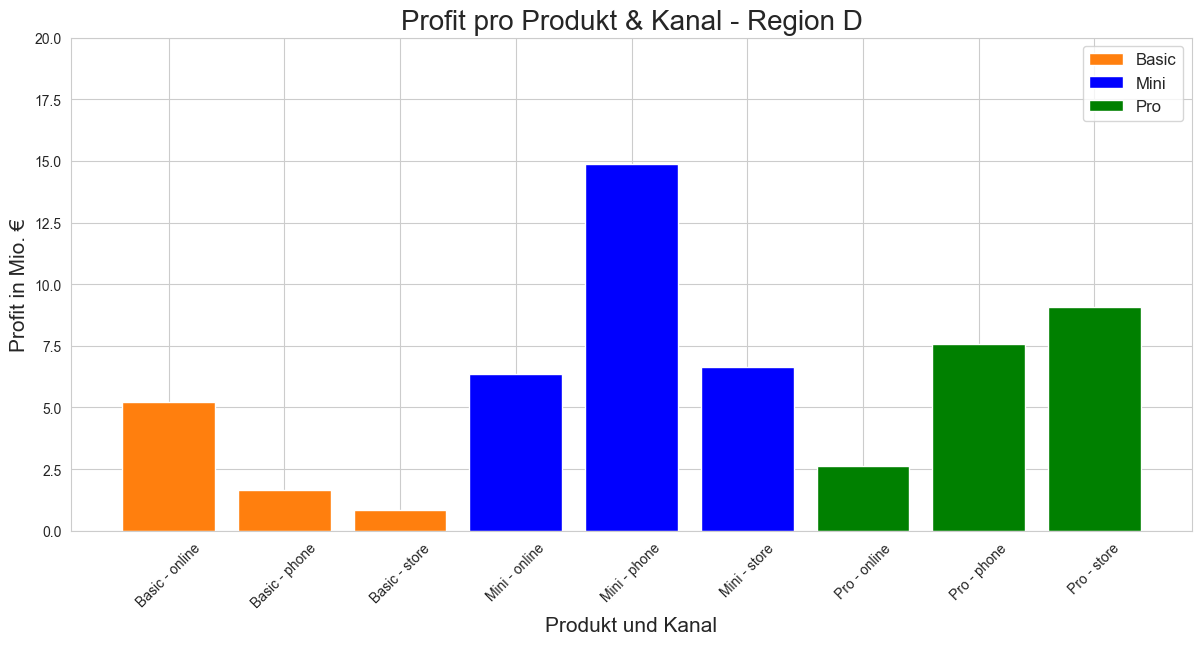

In [ ]:
region_costs = ["D"] 
plot_profit_per_product_channel_region(region_costs, profit_per_region_product_channel)

Das Balkendiagramm zeigt den Gesamtprofit aufgeteilt nach den einzelnen Produkte und Vertriebskanälen in der Region D. <br>
Links das Tablet Basic, in der Mitte das Tablet Mini und rechts das Tablet Pro. <br>
Die Extrema sind hier als Maximum das Mini + Phone mit 15 Millionen € und als Minimum das Basic + Store mit 1 Millionen €. <br>
Generell sind die Profitströme, hier sehr unterschiedlich verteilt, aber trotzdem in jeder Kombination höher als bei der Region A <br>

Die Kombination Mini + Phone und Pro + Store zeigen wieder gut, was der Region A fehlt. <br>
Die drei Kombinationen Basic + Online, Mini + Phone und Pro + Store sind hier die wichtigsten Profitstützen, <br> wobei die erste Kombination im Verlauf des Beobachtungszeitraums immer mehr an Wert verlieren wird. <br>

Das Diagramm ist sehr ähnlich zu B, wobei die Kombination Pro + Store hier am so höchsten ist von allen Regionen und <br> 
die Kombination Basic + Online besonders klein ist Vergleich zu den anderen Kombinationen. <br>
Höchstwahrscheinlich liegt der Grund für dieses Verhalten, daran das der Wendepunkt hier am frühesten stattfindet. <br>


## Ergebnisse der Performance-Analyse der Regionen

Der Abwärtstrend vom Online Kanal und Basic Produkt schlägt sich in den Regionen unterschiedlich aus, findet aber überall statt. <br>
Region A leidet am meisten darunter, da sie am meisten über den Online Kanal verkauft und die Verkaufszahlen im Phone und Store noch nicht groß genug sind, um das auszugleichen. <br>

Die anderen Regionen sind bei Profitgewinnung sehr ähnlich zueinander und können das Defizit aus dem Online Kanal besser ausgleichen.<br>
Besonders aufgrund der Mini + Phone und der Pro + Store Kombination, die hier am profitabelsten sind. <br>
Die Überperformance von D ist darauf zurückzuführen, dass sie am frühesten den Wendepunkt, also die Verkaufszahlsteigerung im Phone und Store Kanal erreicht haben. <br>

Wenn man die Regionen danach aufreiht, wann sie den Wendepunkt erreicht haben, also an erster Stelle D, B, C und A, sieht man hier wieder die Reihenfolge wie bei den Umsatzanteilen, D:32.8%, B: 29.1%, C: 25.3%, A: 12.7%. <br>

## Handlungsempfehlungen

Da die Regionen B bis D den Übergang vom Online Kanal zum Phone und Store Kanal schon geschafft haben, <br>
fokusieren wir uns auf die Region A, die noch am Anfang des Übergangs steht. <br>

Das Steigen der Verkaufszahlen im Phone und Store Kanal muss hier beschleunigt werden, <br>
dementsprechend empfehlen wir die Werbung zuerst eine Analyse der Kanäle zu machen, <br>
nach deren Ergebnissen wir die Performance der Kanäle verbessern können. <br>

Zudem empfehlen wir eine Mitarbeiterperformance Analyse durchzuführen, <br>
da die Kanäle Phone und Store stark von den Mitarbeitern abhängen, grade in der individuellen Beratung.<br>

Als eine weitere Maßnahme empfehlen wir einen Wissenstransfer mit den anderen Regionen, <br>
da diese schon den Übergang geschafft haben und die Region A von deren Erfahrungen profitieren kann. <br>

Zuletzt sollte man den Auftritt von den Produkten Mini und Pro in der Region A verbessern, <br>
mithilfe von Werbeaktionen, da diese Produkte in den anderen Regionen sehr gut performen. <br>